In [2]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec

from utils import *
from utilsPCA import *
from plotting import *
from efficiency import *
from isolation import *

import matplotlib as mpl

mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 
mpl.rc('axes', labelsize=16, titlesize=20)

#plt.style.use(hep.style.CMS)
%matplotlib inline

In [3]:
C = 29.9792458 #cm/ns

In [38]:
import os
os.listdir('/eos/user/a/aperego/Timing/root_files/')

['.sys.v#.Histo.txt',
 '.sys.v#.btl_plots.txt',
 '.sys.v#.etl_plots.txt',
 '.sys.v#.histo.root',
 '.sys.v#.histo_10Pion_MTDclusters.root',
 '.sys.v#.histo_1Pion4eff.root',
 '.sys.v#.histo_2Electrons_20893_boundary.root',
 '.sys.v#.histo_2Electrons_20893_etl_500ps.root',
 '.sys.v#.histo_2Electrons_20893_etl_500ps_noOff.root',
 '.sys.v#.histo_2Electrons_20893_etl_500ps_noOff_100GeV.root',
 '.sys.v#.histo_2Electrons_20893_mtdclusters.root',
 '.sys.v#.histo_2Electrons_global_pos.root',
 '.sys.v#.histo_2Photons_1stLayerHGCal.root',
 '.sys.v#.histo_2PionsVertex_betamtd.root',
 '.sys.v#.histo_2Pions_20891_tMtd.root',
 '.sys.v#.histo_2Pions_vertex_100_etl.root',
 '.sys.v#.histo_2electrons_CloseByBeforeMTD_deltaT.root',
 '.sys.v#.histo_2gammas_CloseBydeltaT.root',
 '.sys.v#.histo_2photons_CloseByBeforeMTD_deltaT.root',
 '.sys.v#.histo_2pion_20891.root',
 '.sys.v#.histo_Ele_MTD_OuterHits.root',
 '.sys.v#.histo_Felice.root',
 '.sys.v#.histo_MTD_withEtaPhiPt.root',
 '.sys.v#.histo_SinglePi_3LC.roo

In [75]:
filename = '/eos/user/a/aperego/Timing/root_files/histo_10Pion_MTDclusters.root'
# filename = '/eos/user/a/aperego/Timing/root_files/histo_MTD_rechits.root'
#filename = '/eos/user/a/aperego/Timing/root_files/histo_multiParticleMTD.root'
filename = '/eos/user/a/aperego/Timing/root_files/histo_newEle.root'
file = uproot.open(filename)

In [76]:
#file.keys()

In [77]:
simtrackstersSC = file["ticlDumper/simtrackstersSC"]
simtrackstersCP = file["ticlDumper/simtrackstersCP"]
tracksters  = file["ticlDumper/tracksters"]
trackstersMerged = file["ticlDumper/trackstersMerged"]
associations = file["ticlDumper/associations"]
tracks = file["ticlDumper/tracks"]
simTICLCandidate = file["ticlDumper/simTICLCandidate"]
TICLCandidate = file["ticlDumper/candidates"]
clusters = file["ticlDumper/clusters"]
MTDclusters = file["ticlDumper/MTDclusters"]

In [78]:
MTDclusters.keys()

['nTracks',
 'recoTrackIdx',
 'simTrackIdx',
 'simTracksterTime',
 'simTracksterPos',
 'simTracksterPos/simTracksterPos.theVector.theX',
 'simTracksterPos/simTracksterPos.theVector.theY',
 'simTracksterPos/simTracksterPos.theVector.theZ',
 'simTracksterNsimLC',
 'recoTrackNclusters',
 'recoLCtime',
 'recoCLtimeErr',
 'recoCLdirect',
 'simLCtime',
 'simTrackPt',
 'simTrackEta',
 'simTrackPhi',
 'simLCmatch',
 'simLCcorrect',
 'simLCdirect']

In [79]:
tracksters_CALO_time = tracksters["time"].array()
trackstersMerged_CALO_time = trackstersMerged["time"].array()
SC_CALO_time = simtrackstersSC["time"].array()
CP_CALO_time = simtrackstersCP["time"].array()

In [80]:
MTD_data = MTDclusters.arrays([
  "nTracks",
  "recoTrackIdx",
  "simTrackIdx",
  "simTracksterTime",
  "simTracksterPos",
  "simTracksterNsimLC",
  "recoTrackNclusters",
  "recoLCtime",
  "recoCLtimeErr",
  "recoCLdirect",
  "simLCtime",
  "simTrackPt",
  "simTrackEta",
  "simTrackPhi",
  "simLCmatch",
  "simLCcorrect",
  "simLCdirect" #,
#  "hitPt",
#  "hitEta",
#  "hitPhi",
#  "hitMatch"
])

In [81]:
# TICLDumper V1
# number_of_mtdSimTracksters = MTDclusters["number_of_mtdSimTracksters"].array()
# number_of_mtdSimLCinST = MTDclusters["number_of_mtdSimLCinST"].array()
# number_of_mtdHits = MTDclusters["number_of_mtdHits"].array()
# mtdHits_det = MTDclusters["mtdHits_det"].array()
# ST_simTrack = MTDclusters["ST_simTrack"].array()
# ST_simTrack_pt = MTDclusters["ST_simTrack_pt"].array()
# ST_simTrack_eta = MTDclusters["ST_simTrack_eta_"].array()
# ST_simTrack_phi = MTDclusters["ST_simTrack_phi_"].array()
# ST_recoTrack = MTDclusters["ST_recoTrack"].array()
# ST_rtMissingOutHits = MTDclusters["ST_rtMissingOutHits"].array()
# simLC_is_looper = MTDclusters["simLC_is_looper"].array()
# simLC_idx = MTDclusters["simLC_idx"].array()
# simLC_simTrack = MTDclusters["simLC_simTrack"].array()
# simLC_recoTrack = MTDclusters["simLC_recoTrack"].array()
# simLC_time = MTDclusters["simLC_time"].array()
# simLC_posX = MTDclusters["simLC_posX"].array()
# simLC_posY = MTDclusters["simLC_posY"].array()
# recocluster_time = MTDclusters["recocluster_time"].array()
# recocluster_timeErr = MTDclusters["recocluster_timeErr"].array()
# recocluster_posX = MTDclusters["recocluster_posX"].array()
# recocluster_posY = MTDclusters["recocluster_posY"].array()
# simLC_matched = MTDclusters["sc_matched"].array()
# simLC_CorrectMatch = MTDclusters["sc_CorrMatched"].array()
# simLC_DirectMatch = MTDclusters["sc_DirectMatched"].array()

In [82]:
print(f'There are {len(MTD_data)} events in the file')
NEVENTS = len(MTD_data)

There are 1000 events in the file


## start

In [12]:
ev=1
print("nTracks", MTD_data[ev]["nTracks"])
print("recoTrackIdx", MTD_data[ev]["recoTrackIdx"])
print("simTrackIdx", MTD_data[ev]["simTrackIdx"])
print("simTracksterTime", MTD_data[ev]["simTracksterTime"])
# print("simTracksterPos", MTD_data[ev]["simTracksterPos"])
print("simTracksterNsimLC", MTD_data[ev]["simTracksterNsimLC"])
print("recoTrackNclusters", MTD_data[ev]["recoTrackNclusters"])
print("recoLCtime", MTD_data[ev]["recoLCtime"])
print("recoCLtimeErr", MTD_data[ev]["recoCLtimeErr"])
print("recoCLdirect", MTD_data[ev]["recoCLdirect"])
print("simLCtime", MTD_data[ev]["simLCtime"])
print("simTrackPt", MTD_data[ev]["simTrackPt"])
print("simTrackEta", MTD_data[ev]["simTrackEta"])
print("simTrackPhi", MTD_data[ev]["simTrackPhi"])
print("simLCmatch", MTD_data[ev]["simLCmatch"])
print("simLCcorrect", MTD_data[ev]["simLCcorrect"])
print("simLCdirect", MTD_data[ev]["simLCdirect"])

nTracks 20
recoTrackIdx [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
simTrackIdx [3, -2, -2, 11, 1, 9, 19, 5, 17, 2, 10, 4, 16, 12, 8, -2, 20, 6, 18, 14]
simTracksterTime [11, -1, -1, 19.3, 10.7, 10.8, 10.7, ... 10.6, 10.1, -1, 10.2, 10.2, 10.1, 10.2]
simTracksterNsimLC [2, 0, 0, 1, 2, 2, 1, 2, 2, 2, 2, 4, 2, 2, 2, 0, 6, 3, 13, 2]
recoTrackNclusters [2, 0, 0, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2]
recoLCtime [[11, 11.1], [0], [0], [0], ... 0, 0, 0, 11.4, 11.7, 12, 0, 0], [10.3, 10.3]]
recoCLtimeErr [[0.039, 0.039], [-1], [-1], [-1, ... [0.039, 0.039], [0.039, 0.039], [0.039, 0.039]]
recoCLdirect [[1, 1], [0], [0], [0], [1, 1], [1, 1], ... 1], [0], [1, 1], [1, 1], [1, 1], [1, 1]]
simLCtime [[11, 11.1], [0], [0], [19.3, ... 11.3, 11.4, 11.7, 12, 12.7, 15.5], [10.2, 10.3]]
simTrackPt [138, 16.4, 179, 62.3, 15.7, 89.6, 72, 71.4, ... 62.3, 156, 156, 72, 71.4, 113, 179]
simTrackEta [1.73, 1.71, 2.04, 1.72, 2.09, 1.87, ... -2.13, 2.13, -2.13, -2.07, -2.22

In [11]:
res = []
nsigma = []
for MTD in MTD_data:
    for pion in range(len(MTD.simLCtime)):
        for recoTime, recoTimeErr, simTime, simToReco in zip(MTD.recoLCtime[pion], MTD.recoCLtimeErr[pion], MTD.simLCtime[pion], MTD.simLCdirect[pion]):
            if(recoTime > 0 and simTime > 0 and simToReco == 1 and recoTimeErr != -1):
                res.append(simTime-recoTime)
                nsigma.append((simTime-recoTime)/recoTimeErr)
            
# reco_clu_time = MTD_data["recoLCtime"][MTD_data["recoLCtime"]>0]
# reco_clu_match = MTD_data["recoCLdirect"][MTD_data["recoLCtime"]>0]
# sim_clu_time = MTD_data["simLCtime"][MTD_data["simLCtime"]>0]
# sim_clu_match = MTD_data["simLCdirect"][MTD_data["simLCtime"]>0]

# plt.figure(dpi=100)
# rmin = ak.min(reco_clu_time)
# rmax = ak.max(reco_clu_time)
# plt.hist(ak.flatten(ak.flatten(reco_clu_time[reco_clu_match==1])), density=True, bins=30, alpha=.5, label="reco", range=(rmin,rmax))
# plt.hist(ak.flatten(ak.flatten(sim_clu_time[sim_clu_match==1])), density=True, bins=30, color="red", histtype="step", label="sim", range=(rmin,rmax))
# plt.grid()
# plt.legend()
# plt.title('MTD time')
# plt.xlabel('t (ns)', size=18)
# plt.ylabel('Counts / bin', size=18)
# # plt.xlim(7.5,20)
# plt.show()

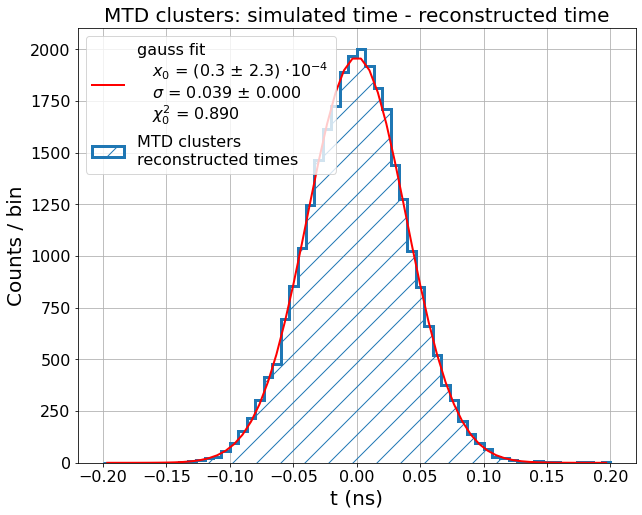

In [33]:
# plt.figure(dpi=100)
# plt.hist(res, range=(-0.2,0.2), bins=50)
# plt.grid()
# plt.show()

plt.figure(figsize=(10, 8))

# plt.subplot(1, 2, 2)
# LIM=5
# bins=60
# hist, nbins = np.histogram(nsigma, bins=bins, range=(-LIM,LIM))
# nbins = 0.5 * (nbins[1:] + nbins[:-1])
# errors = [np.sqrt(oh+1) for oh in hist]
# init_parameters = [2000,0.0,0.1]
# cost_func = cost.LeastSquares(nbins, hist, errors, model)
# min_obj = Minuit(cost_func, *init_parameters)
# result = min_obj.migrad()
# chi2 = min_obj.fval/(len(nbins)-3)
# plt.hist(nsigma,   bins=bins, histtype="step", linewidth=3, label="MTD clusters\nreconstructed times", hatch="/", range=(-LIM,LIM))
# y = model(nbins, *result.values)
# plt.plot(nbins, y, label=f'gauss fit\n   $\sigma$ = {result.values[2]:.3f} $\pm$ {result.errors[2]:.3f}\n   $x_0$ = {result.values[1]:.3f} $\pm$ {result.errors[1]:.3f} \n   $\chi^2_0$ = {chi2:.3f}', 
#          color="red", linewidth=2)
# plt.xlabel("# of $\sigma$", fontsize=20)
# plt.ylabel("Counts / bin", fontsize=20)
# plt.title("residuals of the MTD clusters times")
# plt.legend(fontsize=14)
# plt.grid()

# # plt.subplot(1, 2, 1)
LIM=0.2
bins=60
hist, nbins = np.histogram(res, bins=bins, range=(-LIM,LIM))
nbins = 0.5 * (nbins[1:] + nbins[:-1])
errors = [np.sqrt(oh+1) for oh in hist]
init_parameters = [2000,0.0,0.1]
cost_func = cost.LeastSquares(nbins, hist, errors, model)
min_obj = Minuit(cost_func, *init_parameters)
result = min_obj.migrad()
chi2 = min_obj.fval/(len(nbins)-3)
plt.hist(res,   bins=bins, histtype="step", linewidth=3, label="MTD clusters\nreconstructed times", hatch="/", range=(-LIM,LIM))
y = model(nbins, *result.values)
plt.plot(nbins, y, 
         label="gauss fit\n   $x_0$ = (0.3 $\pm$ 2.3) $\cdot 10^{-4}$"+f' \n   $\sigma$ = {result.values[2]:.3f} $\pm$ {result.errors[2]:.3f}\n   $\chi^2_0$ = {chi2:.3f}', 
         #label=f'gauss fit\n   $x_0$ = ({result.values[1]:.5f} $\pm$ {result.errors[1]:.5f *10**5}) $\cdot 10^{-5}$ \n   $\sigma$ = {result.values[2]:.3f} $\pm$ {result.errors[2]:.3f}\n   $\chi^2_0$ = {chi2:.3f}", 
         color="red", linewidth=2)
plt.ylabel("Counts / bin", fontsize=20)
plt.xlabel("t (ns)", fontsize=20)
plt.title("MTD clusters: simulated time - reconstructed time")
plt.legend(fontsize=16, loc="upper left")
plt.grid()

In [15]:
result

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 50.72 (chi2/ndof = 0.9)    │              Nfcn = 133              │
│ EDM = 7.04e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A     │  1.963e3  │  0.014e3  │            │            │         │         │       │
│ 1 │ x0    │  0.03e-3  │  0.23e-3  │            │            │         │         │       │
│ 2 │ sigma │ 38.97e-3  │  0.17e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │         A        x0     sigma │
├───────┼───────────────────────────────┤
│     A │       202  1.25e-05  -0.00136 │
│    x0 │  1.25e-05  5.33e-08 -2.68e-10 │
│ sigma │  -0.00136 -2.68e-10  2.71e-08 │
└───────┴───────────────────────────────┘

## plots

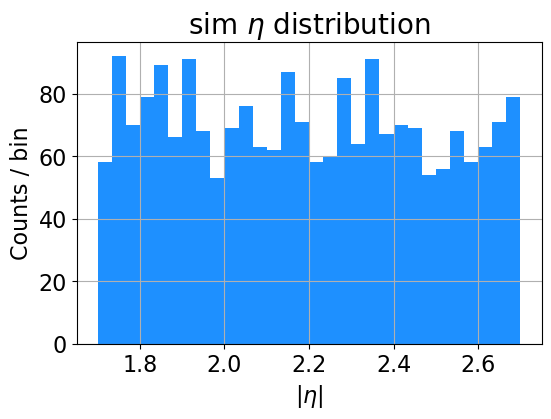

In [13]:
hist(abs(MTD_data.simTrackEta[MTD_data.simTrackPt>-1]), xlabel="|$\eta$|", ylabel="Counts / bin", title="sim $\eta$ distribution")

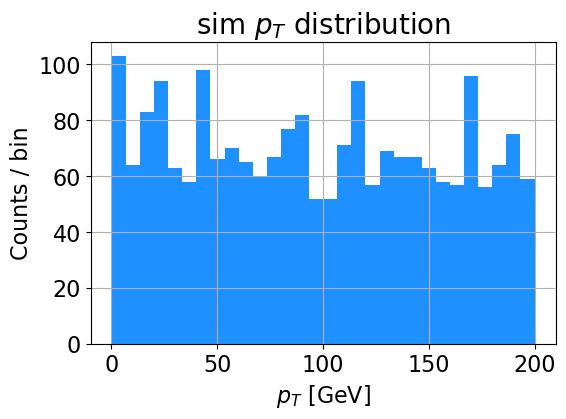

In [14]:
hist(MTD_data.simTrackPt[MTD_data.simTrackPt>-1], xlabel="$p_T$ [GeV]", ylabel="Counts / bin", title="sim $p_T$ distribution")

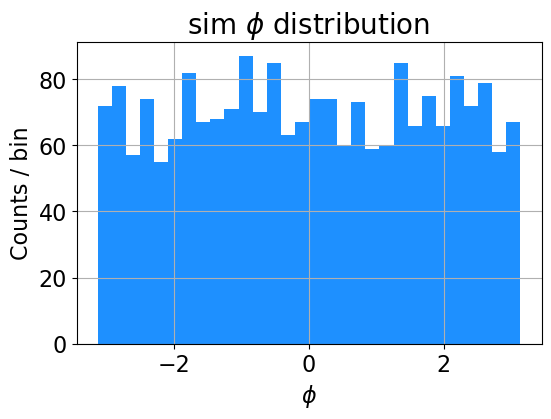

In [15]:
hist(MTD_data.simTrackPhi[MTD_data.simTrackPt>-1], xlabel="$\phi$", ylabel="Counts / bin", title="sim $\phi$ distribution")

In [16]:
#hist(ST_rtMissingOutHits[ST_rtMissingOutHits>-1], bins=10, xlabel="# missing OuterHits", ylabel="Counts / bin", title="Missing outer hits in the ctf tracks")

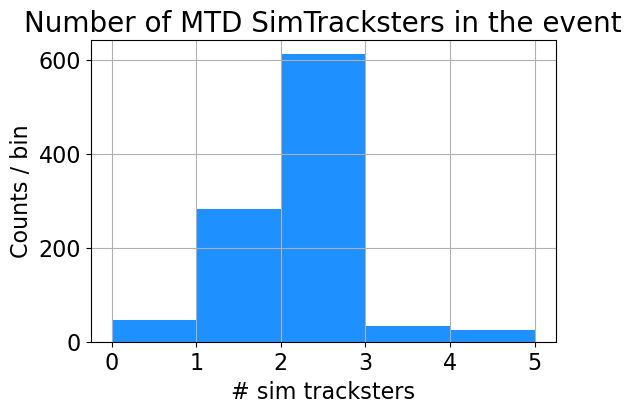

In [17]:
X = ak.count(MTD_data.simTracksterNsimLC[MTD_data.simTracksterNsimLC!=0], axis=1)
nphist(X, title="Number of MTD SimTracksters in the event", xlabel="# sim tracksters", ylabel="Counts / bin", bins=ak.max(X))

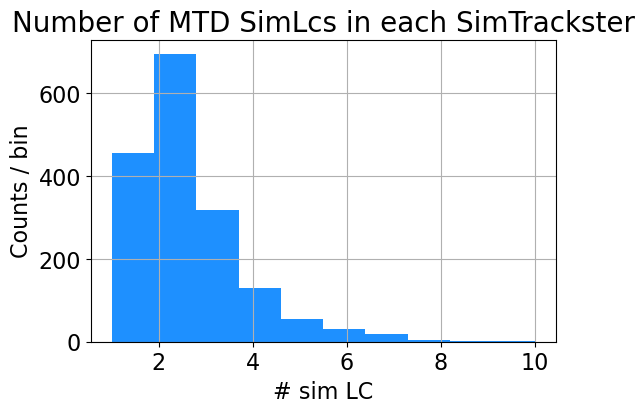

In [18]:
sup = ak.max(MTD_data.simTracksterNsimLC[MTD_data.simTracksterNsimLC!=0])
hist_range(MTD_data.simTracksterNsimLC[MTD_data.simTracksterNsimLC!=0], (1,sup), title="Number of MTD SimLcs in each SimTrackster", xlabel="# sim LC", ylabel="Counts / bin", bins=sup)
# hist(number_of_mtdSimLCinST, title="Number of MTD SimLcs in each SimTrackster", xlabel="# sim LC", ylabel="Counts / bin", bins=ak.max(number_of_mtdSimLCinST)+1, range=(0,10))

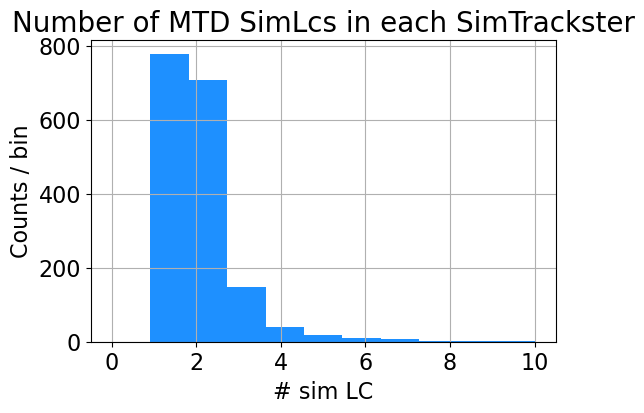

In [19]:
#try to remove loopers
nSimLCnoLoop = []
#loop on events
for i, MTD in enumerate(MTD_data): 
    # loop on tracks
    for tid in range(MTD.nTracks):
        nLC = 0
        if MTD.simTracksterNsimLC[tid]==0:
            continue
        for LC in range(MTD.simTracksterNsimLC[tid]):
            if (MTD.simLCtime[tid][LC] - MTD.simTracksterTime[tid]) < 0.15: 
                nLC += 1
        nSimLCnoLoop.append(nLC)

sup = max(nSimLCnoLoop)
nphist(nSimLCnoLoop, ran=(0,sup), title="Number of MTD SimLcs in each SimTrackster", xlabel="# sim LC", ylabel="Counts / bin", bins=sup+1)
# hist(number_of_mtdSimLCinST, title="Number of MTD SimLcs in each SimTrackster", xlabel="# sim LC", ylabel="Counts / bin", bins=ak.max(number_of_mtdSimLCinST)+1, range=(0,10))

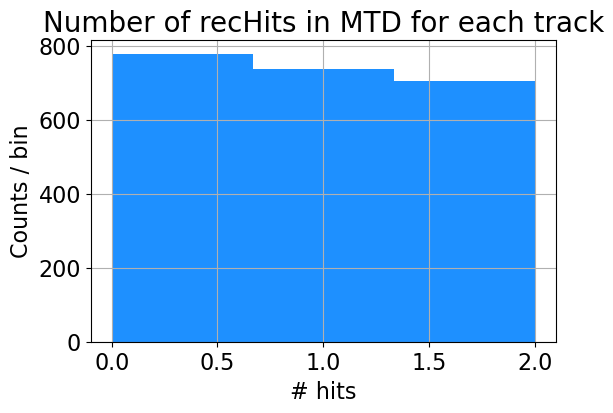

In [20]:
hist(MTD_data.recoTrackNclusters, title="Number of recHits in MTD for each track", xlabel="# hits", ylabel="Counts / bin", bins=ak.max(MTD_data.recoTrackNclusters)+1)

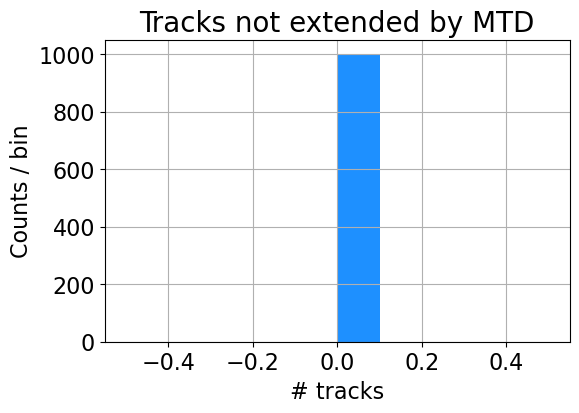

In [21]:
X = MTD_data.nTracks - ak.count(MTD_data.recoTrackIdx, axis=1)
nphist(X, title="Tracks not extended by MTD", xlabel="# tracks", ylabel="Counts / bin", bins=10)

## tracksters time

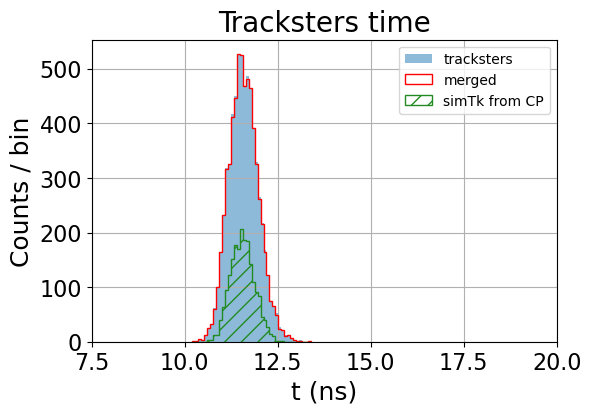

In [53]:
plt.figure(dpi=100)
rmin = min(ak.min(tracksters_CALO_time[tracksters_CALO_time>-99]), ak.min(trackstersMerged_CALO_time[trackstersMerged_CALO_time>-99]))
rmax = max(ak.max(tracksters_CALO_time[tracksters_CALO_time>-99]), ak.max(trackstersMerged_CALO_time[trackstersMerged_CALO_time>-99]))
plt.hist(ak.flatten(tracksters_CALO_time[tracksters_CALO_time>-99]), bins=40, alpha=.5, label="tracksters", range=(rmin,rmax))
plt.hist(ak.flatten(trackstersMerged_CALO_time[trackstersMerged_CALO_time>-99]), bins=40, color="red", histtype="step", label="merged", range=(rmin,rmax))
plt.hist(ak.flatten(CP_CALO_time[CP_CALO_time>-99]), bins=40, color="forestgreen", histtype="step", label="simTk from CP", range=(rmin,rmax), hatch="//")
plt.grid()
plt.legend()
plt.title('Tracksters time')
plt.xlabel('t (ns)', size=18)
plt.ylabel('Counts / bin', size=18)
plt.xlim(7.5,20)
plt.show()

## hit efficiency

In [45]:
num_eta = []
den_eta = []
num_phi = []
den_phi = []
num_pt  = []
den_pt  = []
for MTD in MTD_data:
    for tid in range(len(MTD.hitPt)):
        pt = MTD.hitPt[tid]
        eta = abs(MTD.hitEta[tid])
        phi = MTD.hitPhi[tid]
        if pt < 1:
            continue
        
        den_eta.append(eta)
        den_phi.append(phi)
        den_pt.append(pt)

        if MTD.hitMatch[tid]:
            num_eta.append(eta)
            num_phi.append(phi)
            num_pt.append(pt)

AttributeError: no field named 'hitPt'

(https://github.com/scikit-hep/awkward-1.0/blob/1.10.1/src/awkward/highlevel.py#L1846)

Text(0.5, 1.0, 'Efficiency as a function of $\\phi$')

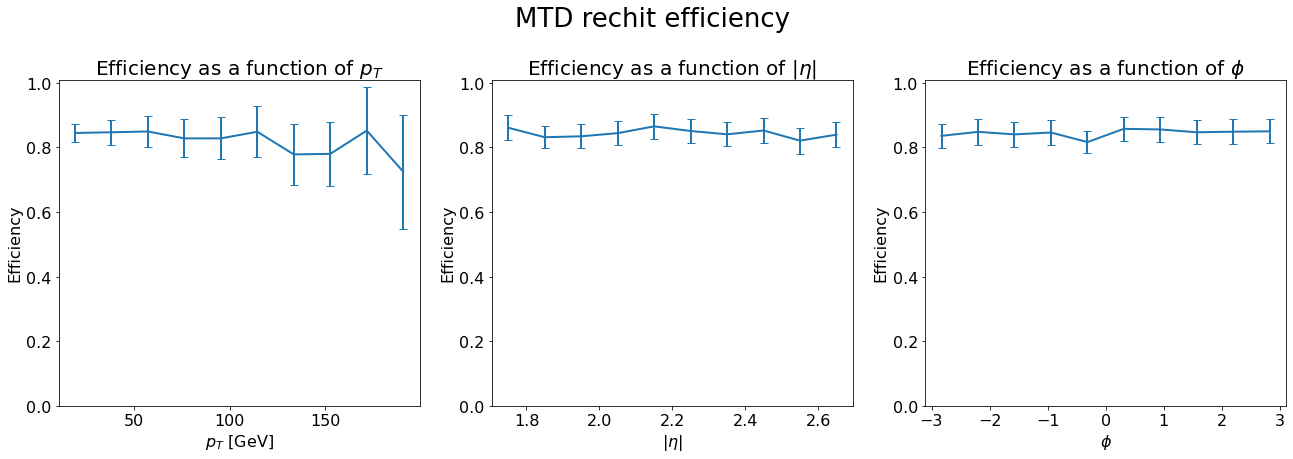

In [29]:
uflow = False
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22,6))
# fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(42,17))

fig.suptitle('MTD rechit efficiency', fontsize=26, y=1.05)

hN, uN, cN, eN = extended_hist(np.array(num_pt), nbins = 10, range = (10, 200), underflow = uflow, overflow = uflow)
hD, uD, cD, eD = extended_hist(np.array(den_pt), nbins = 10, range = (10, 200), underflow = uflow, overflow = uflow)
errs = computeErrorRatio(hN,hD,uN,uD)
ax1.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)
ax1.set_xlabel("$p_T$ [GeV]")
ax1.set_ylabel("Efficiency")
ax1.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax1.set_title("Efficiency as a function of $p_T$")

hN, uN, cN, eN = extended_hist(np.array(num_eta), nbins = 10, range = (1.7, 2.7), underflow = uflow, overflow = uflow)
hD, uD, cD, eD = extended_hist(np.array(den_eta), nbins = 10, range = (1.7, 2.7), underflow = uflow, overflow = uflow)
errs = computeErrorRatio(hN,hD,uN,uD)
ax2.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)
ax2.set_xlabel("|$\eta$|")
ax2.set_ylabel("Efficiency")
ax2.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax2.set_title("Efficiency as a function of |$\eta$|")

hN, uN, cN, eN = extended_hist(np.array(num_phi), nbins = 10, range = (-np.pi, np.pi), underflow = uflow, overflow = uflow)
hD, uD, cD, eD = extended_hist(np.array(den_phi), nbins = 10, range = (-np.pi, np.pi), underflow = uflow, overflow = uflow)
errs = computeErrorRatio(hN,hD,uN,uD)
ax3.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)
ax3.set_xlabel("$\phi$")
ax3.set_ylabel("Efficiency")
ax3.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax3.set_title("Efficiency as a function of $\phi$")

## sim vs reco

In [83]:
import matplotlib as mpl

mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('axes', labelsize=20, titlesize=20)

In [84]:
numReco_eta = []
numSim_eta = []
den_eta = []
numReco_phi = []
numSim_phi = []
den_phi = []
numReco_pt = []
numSim_pt = []
den_pt = []
for MTD in MTD_data:
    for tid in range(MTD.nTracks):
        pt = MTD.simTrackPt[tid]
        eta = abs(MTD.simTrackEta[tid])
        phi = MTD.simTrackPhi[tid]
        if pt < 1:
            continue
        if MTD.simTrackIdx[tid] == -1:
            continue # fake
        den_pt.append(pt)
        den_eta.append(eta)
        den_phi.append(phi)
        if MTD.recoTrackNclusters[tid] > 0:
            #se match con sim ok
            if sum(MTD.recoCLdirect[tid]) > 0:
                numReco_pt.append(pt)
                numReco_eta.append(eta)
                numReco_phi.append(phi)
        if MTD.simTracksterNsimLC[tid] > 0:
            if sum(MTD.simLCdirect[tid]) > 0: # check also looper!
                numSim_pt.append(pt)
                numSim_eta.append(eta)
                numSim_phi.append(phi)

In [85]:
def plot_line(num, den, ax, ran, c="dodgerblue", lab="data"):
    hN, uN, cN, eN = extended_hist(np.array(num), nbins = 10, range = ran, underflow = uflow, overflow = uflow)
    hD, uD, cD, eD = extended_hist(np.array(den), nbins = 10, range = ran, underflow = uflow, overflow = uflow)
    errs = computeErrorRatio(hN,hD,uN,uD)
    ax.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2, label=lab, color=c)

Text(0.5, 1.0, 'Efficiency as a function of $\\phi$')

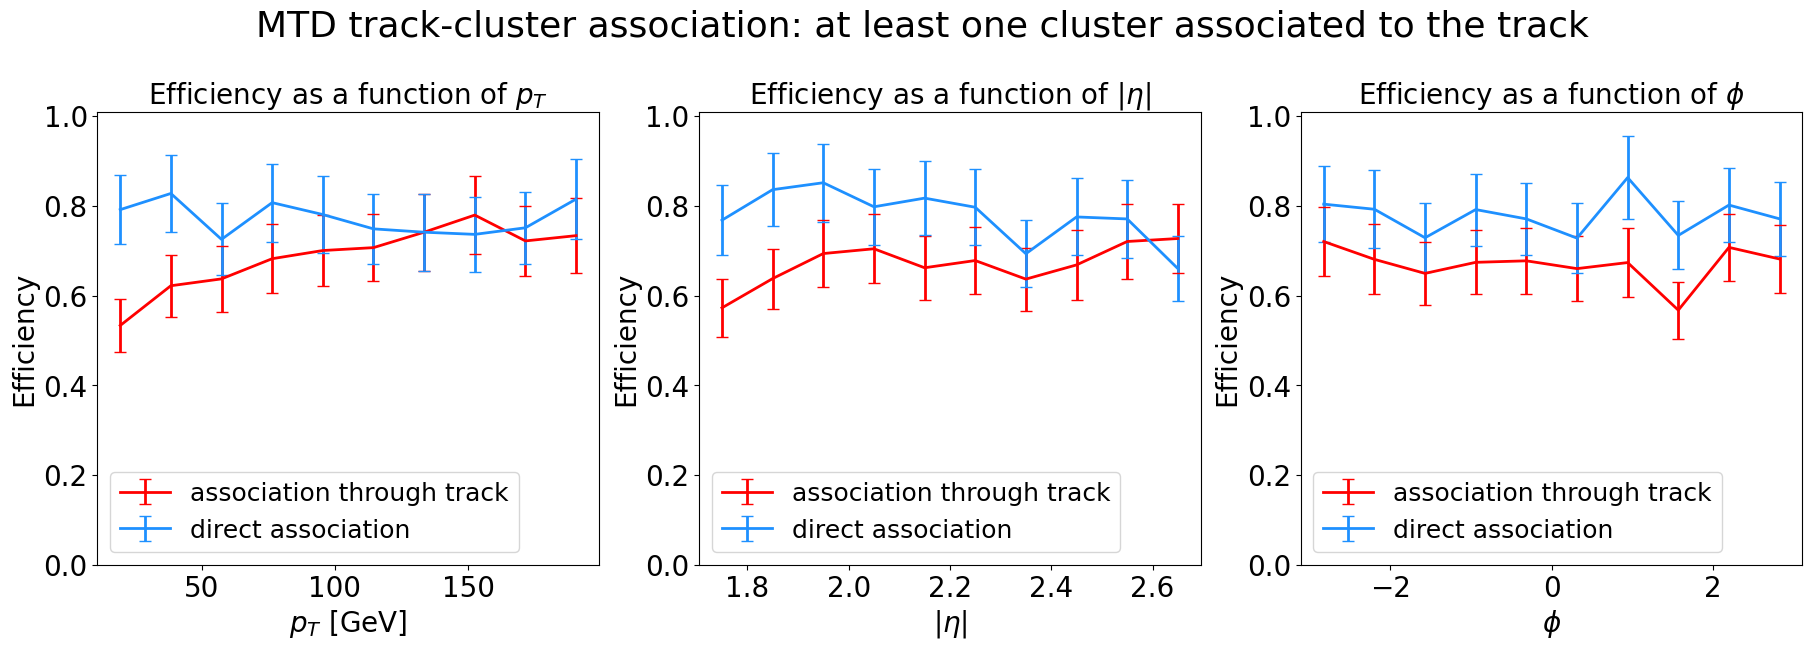

In [86]:
uflow = False
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22,6), dpi=100)
# fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(42,17))

# fig.suptitle('MTD efficiency: >= 1 reco(sim) cluster associated w/ the track and w/ sim(reco) cluster \n/ reco track with pt>1 not fake', fontsize=26, y=1.1)
fig.suptitle('MTD track-cluster association: at least one cluster associated to the track', fontsize=26, y=1.05)

plot_line(numReco_pt, den_pt, ax1, ran=(10,200), c="red", lab="association through track")
plot_line(numSim_pt, den_pt, ax1, ran=(10,200), c="dodgerblue", lab="direct association")
ax1.set_xlabel("$p_T$ [GeV]")
ax1.set_ylabel("Efficiency")
ax1.legend(loc="lower left", fontsize=18)
ax1.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax1.set_title("Efficiency as a function of $p_T$")

plot_line(numReco_eta, den_eta, ax2, ran=(1.7,2.7), c="red", lab="association through track")
plot_line(numSim_eta, den_eta, ax2, ran=(1.7,2.7), c="dodgerblue", lab="direct association")
ax2.set_xlabel("|$\eta$|")
ax2.set_ylabel("Efficiency")
ax2.legend(loc="lower left", fontsize=18)
ax2.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax2.set_title("Efficiency as a function of |$\eta$|")

plot_line(numReco_phi, den_phi, ax3, ran=(-np.pi, np.pi), c="red", lab="association through track")
plot_line(numSim_phi, den_phi, ax3, ran=(-np.pi, np.pi), c="dodgerblue", lab="direct association")
ax3.set_xlabel("$\phi$")
ax3.set_ylabel("Efficiency")
ax3.legend(loc="lower left", fontsize=18)
ax3.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax3.set_title("Efficiency as a function of $\phi$")

In [87]:
numReco_eta = []
numSim_eta = []
den_eta = []
numReco_phi = []
numSim_phi = []
den_phi = []
numReco_pt = []
numSim_pt = []
den_pt = []
#loop on events
for i, MTD in enumerate(MTD_data): 
    # loop on tracks
    for tid in range(MTD.nTracks):
        pt = MTD.simTrackPt[tid]
        eta = abs(MTD.simTrackEta[tid])
        phi = MTD.simTrackPhi[tid]
        if pt < 1:
            continue
        if MTD.simTrackIdx[tid] == -1:# MTD.simTrackIdx[tid] can be -2 -> sim track did not leave hits in mtd
            continue # fake 
        for LC in range(MTD.simTracksterNsimLC[tid]):
            if MTD.simLCtime[tid][LC] > 0.15 + MTD.simTracksterTime[tid]: #looper
                continue
            den_pt.append(pt)
            den_eta.append(eta)
            den_phi.append(phi)
            if MTD.simLCcorrect[tid][LC] == 1:
                numReco_pt.append(pt)
                numReco_eta.append(eta)
                numReco_phi.append(phi)
            if MTD.simLCdirect[tid][LC] == 1:
                numSim_pt.append(pt)
                numSim_eta.append(eta)
                numSim_phi.append(phi)
                
# loop on tracks, if fake skip (if -2 ??)
# for each simLC +1 to the numSim if has been matched directly with a recoLC
# +1 to numReco if the match is correct (sim matched w/ reco and reco with the track)

Text(0.5, 1.0, 'Efficiency as a function of $\\phi$')

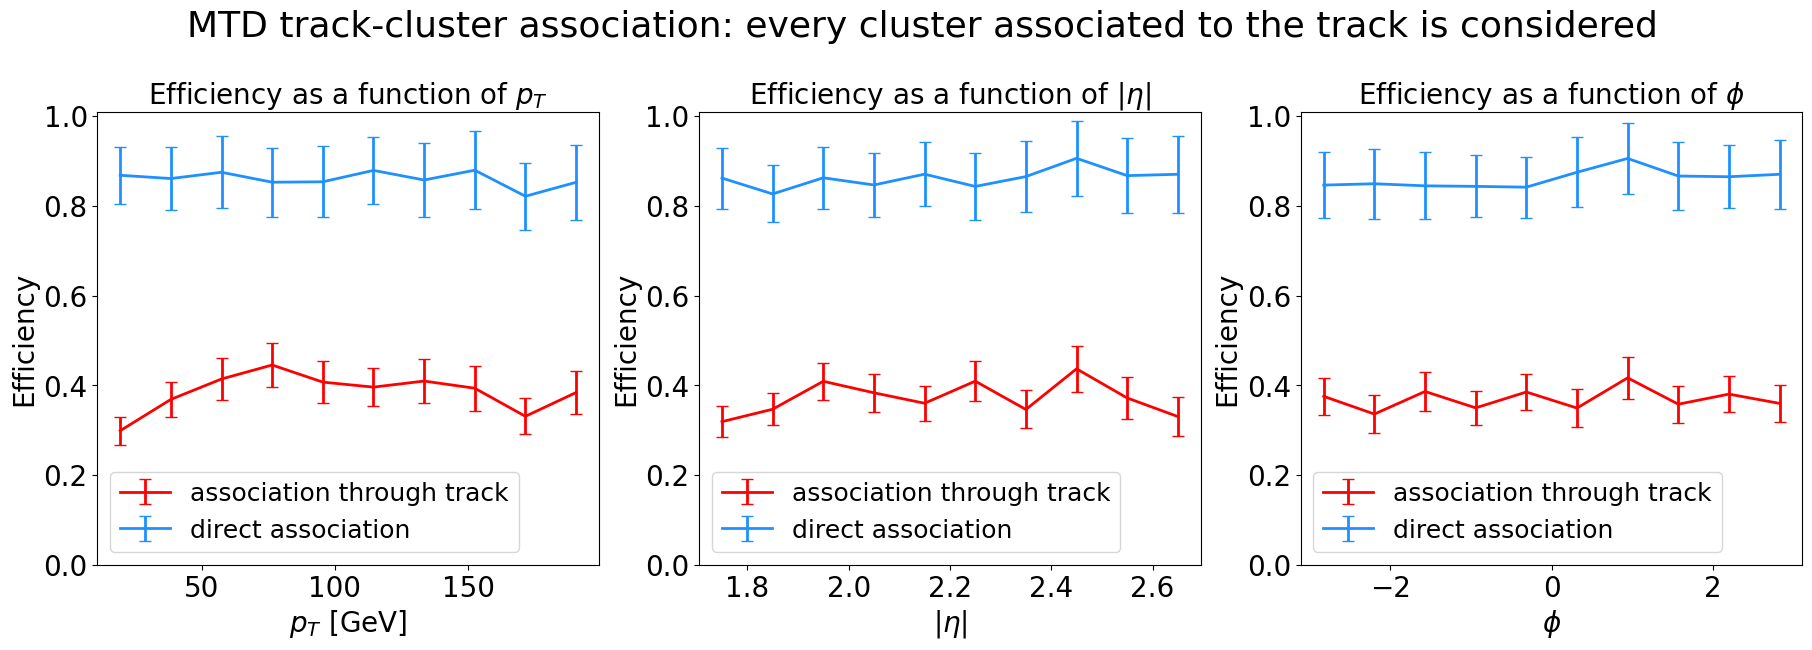

In [88]:
uflow = False
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22,6), dpi=100)
# fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(42,17))

# fig.suptitle('MTD efficiency: sim cluster associated w/ the track and w/ reco cluster (direct/match) \n/ reco track with pt>1 not fake', fontsize=26, y=1.1)
fig.suptitle('MTD track-cluster association: every cluster associated to the track is considered', fontsize=26, y=1.05)

plot_line(numReco_pt, den_pt, ax1, ran=(10,200), c="red", lab="association through track")
plot_line(numSim_pt, den_pt, ax1, ran=(10,200), c="dodgerblue", lab="direct association")
ax1.set_xlabel("$p_T$ [GeV]")
ax1.set_ylabel("Efficiency")
ax1.legend(loc="lower left", fontsize=18)
ax1.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax1.set_title("Efficiency as a function of $p_T$")

plot_line(numReco_eta, den_eta, ax2, ran=(1.7,2.7), c="red", lab="association through track")
plot_line(numSim_eta, den_eta, ax2, ran=(1.7,2.7), c="dodgerblue", lab="direct association")
ax2.set_xlabel("|$\eta$|")
ax2.set_ylabel("Efficiency")
ax2.legend(loc="lower left", fontsize=18)
ax2.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax2.set_title("Efficiency as a function of |$\eta$|")

plot_line(numReco_phi, den_phi, ax3, ran=(-np.pi, np.pi), c="red", lab="association through track")
plot_line(numSim_phi, den_phi, ax3, ran=(-np.pi, np.pi), c="dodgerblue", lab="direct association")
ax3.set_xlabel("$\phi$")
ax3.set_ylabel("Efficiency")
ax3.legend(loc="lower left", fontsize=18)
ax3.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax3.set_title("Efficiency as a function of $\phi$")

## efficiency plots
### efficiency correct over matched

In [61]:
ak.sum(MTD_data.simLCcorrect) / ak.sum(MTD_data.simLCmatch)

0.9747523170341962

In [63]:
den_pt = []
num_pt = []
den_eta = []
num_eta = []
den_phi = []
num_phi = []
for ev in range(NEVENTS):
    for i, [pt, eta, phi] in enumerate(zip(MTD_data.simTrackPt[ev], MTD_data.simTrackEta[ev], MTD_data.simTrackPhi[ev])):
        eta = abs(eta)
        for correct, match in zip(MTD_data.simLCcorrect[ev][i], MTD_data.simLCmatch[ev][i]):
            if match:
                den_pt.append(pt)
                den_eta.append(eta)
                den_phi.append(phi)
            if correct:
                num_pt.append(pt)
                num_eta.append(eta)
                num_phi.append(phi)

Text(0.5, 1.0, 'Efficiency as a function of $\\phi$')

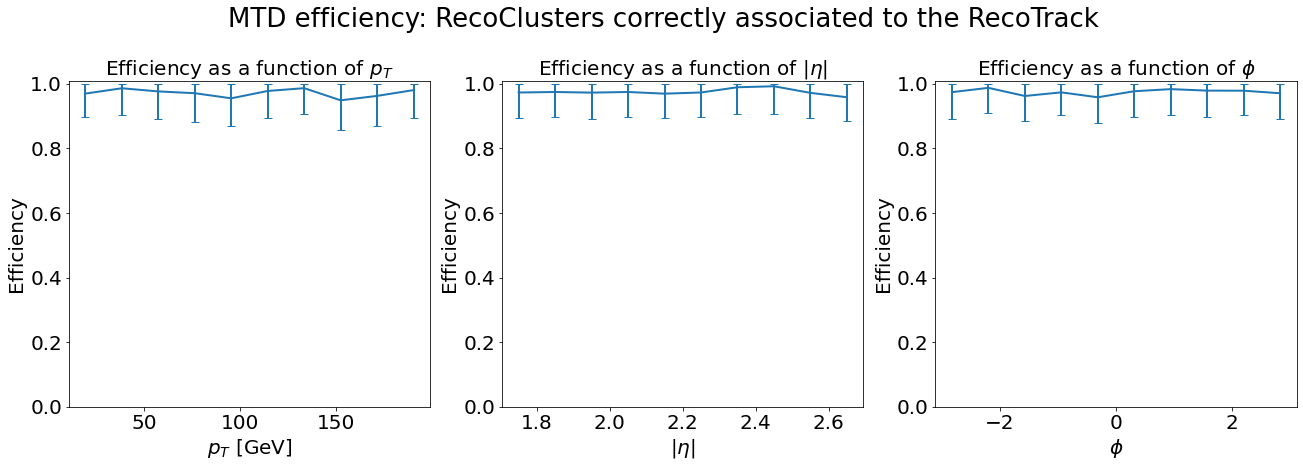

In [64]:
uflow = False
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22,6), dpi=100)
# fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(42,17))

fig.suptitle('MTD efficiency: RecoClusters correctly associated to the RecoTrack', fontsize=26, y=1.05)

hN, uN, cN, eN = extended_hist(np.array(num_pt), nbins = 10, range = (10, 200), underflow = uflow, overflow = uflow)
hD, uD, cD, eD = extended_hist(np.array(den_pt), nbins = 10, range = (10, 200), underflow = uflow, overflow = uflow)
errs = computeErrorRatio(hN,hD,uN,uD)
ax1.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)
ax1.set_xlabel("$p_T$ [GeV]")
ax1.set_ylabel("Efficiency")
ax1.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax1.set_title("Efficiency as a function of $p_T$")

hN, uN, cN, eN = extended_hist(np.array(num_eta), nbins = 10, range = (1.7, 2.7), underflow = uflow, overflow = uflow)
hD, uD, cD, eD = extended_hist(np.array(den_eta), nbins = 10, range = (1.7, 2.7), underflow = uflow, overflow = uflow)
errs = computeErrorRatio(hN,hD,uN,uD)
ax2.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)
ax2.set_xlabel("|$\eta$|")
ax2.set_ylabel("Efficiency")
ax2.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax2.set_title("Efficiency as a function of |$\eta$|")

hN, uN, cN, eN = extended_hist(np.array(num_phi), nbins = 10, range = (-np.pi, np.pi), underflow = uflow, overflow = uflow)
hD, uD, cD, eD = extended_hist(np.array(den_phi), nbins = 10, range = (-np.pi, np.pi), underflow = uflow, overflow = uflow)
errs = computeErrorRatio(hN,hD,uN,uD)
ax3.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)
ax3.set_xlabel("$\phi$")
ax3.set_ylabel("Efficiency")
ax3.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax3.set_title("Efficiency as a function of $\phi$")

## efficiency direct over all

In [65]:
ak.sum(MTD_data.simLCdirect) / ak.sum(MTD_data.simTracksterNsimLC)

0.8574931487090726

In [89]:
den_pt = []
num_pt = []
den_eta = []
num_eta = []
den_phi = []
num_phi = []
for ev in range(NEVENTS):
    for i, [pt, eta, phi] in enumerate(zip(MTD_data.simTrackPt[ev], MTD_data.simTrackEta[ev], MTD_data.simTrackPhi[ev])):
        if pt < 1:
            continue
        eta = abs(eta)
        for direct in MTD_data.simLCdirect[ev][i]:
            den_pt.append(pt)
            den_eta.append(eta)
            den_phi.append(phi)
            if direct:
                num_pt.append(pt)
                num_eta.append(eta)
                num_phi.append(phi)

Text(0.5, 1.0, 'Efficiency as a function of $\\phi$')

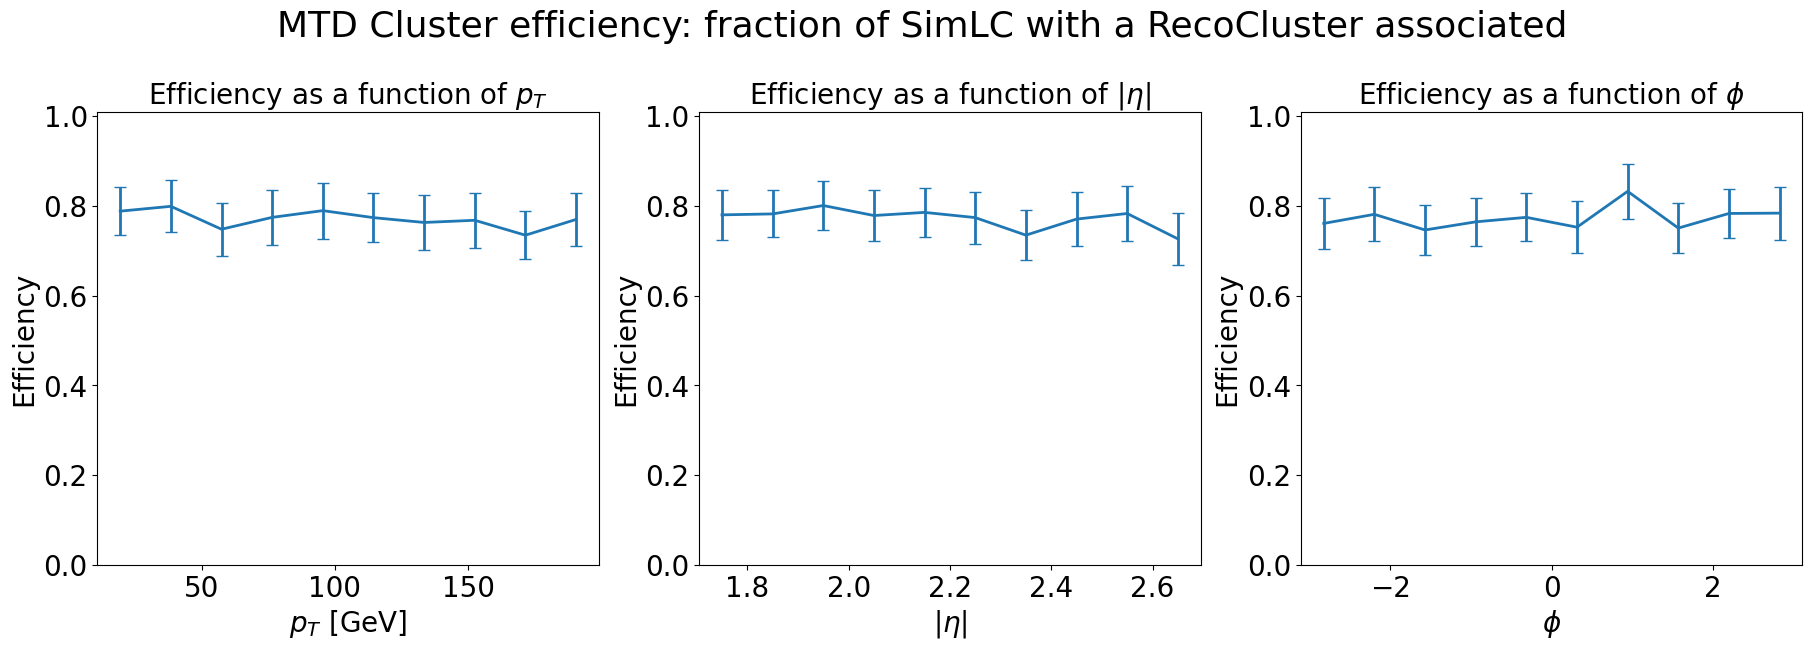

In [90]:
uflow = False
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22,6), dpi=100)
# fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(42,17))

fig.suptitle('MTD Cluster efficiency: fraction of SimLC with a RecoCluster associated', fontsize=26, y=1.05)

hN, uN, cN, eN = extended_hist(np.array(num_pt), nbins = 10, range = (10, 200), underflow = uflow, overflow = uflow)
hD, uD, cD, eD = extended_hist(np.array(den_pt), nbins = 10, range = (10, 200), underflow = uflow, overflow = uflow)
errs = computeErrorRatio(hN,hD,uN,uD)
ax1.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)
ax1.set_xlabel("$p_T$ [GeV]")
ax1.set_ylabel("Efficiency")
ax1.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax1.set_title("Efficiency as a function of $p_T$")

hN, uN, cN, eN = extended_hist(np.array(num_eta), nbins = 10, range = (1.7, 2.7), underflow = uflow, overflow = uflow)
hD, uD, cD, eD = extended_hist(np.array(den_eta), nbins = 10, range = (1.7, 2.7), underflow = uflow, overflow = uflow)
errs = computeErrorRatio(hN,hD,uN,uD)
ax2.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)
ax2.set_xlabel("|$\eta$|")
ax2.set_ylabel("Efficiency")
ax2.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax2.set_title("Efficiency as a function of |$\eta$|")

hN, uN, cN, eN = extended_hist(np.array(num_phi), nbins = 10, range = (-np.pi, np.pi), underflow = uflow, overflow = uflow)
hD, uD, cD, eD = extended_hist(np.array(den_phi), nbins = 10, range = (-np.pi, np.pi), underflow = uflow, overflow = uflow)
errs = computeErrorRatio(hN,hD,uN,uD)
ax3.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)
ax3.set_xlabel("$\phi$")
ax3.set_ylabel("Efficiency")
ax3.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax3.set_title("Efficiency as a function of $\phi$")

## efficiency direct + associated over all (not looper)

In [34]:
den_pt = []
num_pt = []
den_eta = []
num_eta = []
den_phi = []
num_phi = []
den_eta_5 = []
num_eta_5 = []
den_eta_50 = []
num_eta_50 = []
den_eta_10 = []
num_eta_10 = []

for ev in range(NEVENTS):
    for i, [pt, eta, phi] in enumerate(zip(MTD_data.simTrackPt[ev], MTD_data.simTrackEta[ev], MTD_data.simTrackPhi[ev])):
        if pt < 1:
            continue
        eta = abs(eta)
        stTime = MTD_data.simTracksterTime[ev][i]
        for j, [direct, correct, match] in enumerate(zip(MTD_data.simLCdirect[ev][i], MTD_data.simLCcorrect[ev][i], MTD_data.simLCmatch[ev][i])):
            if (MTD_data.simLCtime[ev][i][j] - stTime)>0.15:
                continue
            if direct:
                den_pt.append(pt)
                den_eta.append(eta)
                den_phi.append(phi)
            if correct:
                num_pt.append(pt)
                num_eta.append(eta)
                num_phi.append(phi)

        if pt < 5:
            continue
        for j, [direct, correct, match] in enumerate(zip(MTD_data.simLCdirect[ev][i], MTD_data.simLCcorrect[ev][i], MTD_data.simLCmatch[ev][i])):
            if (MTD_data.simLCtime[ev][i][j] - stTime)>0.15:
                continue
            if direct:
                den_eta_5.append(eta)
                den_eta_5.append(eta)
            if correct:
                num_eta_5.append(eta)
                num_eta_5.append(eta)
                    
        if pt < 10:
            continue
        for j, [direct, correct, match] in enumerate(zip(MTD_data.simLCdirect[ev][i], MTD_data.simLCcorrect[ev][i], MTD_data.simLCmatch[ev][i])):
            if (MTD_data.simLCtime[ev][i][j] - stTime)>0.15:
                continue
            if direct:
                den_eta_10.append(eta)
                den_eta_10.append(eta)
            if correct:
                num_eta_10.append(eta)
                num_eta_10.append(eta)

        if pt < 50:
            continue
        for j, [direct, correct, match] in enumerate(zip(MTD_data.simLCdirect[ev][i], MTD_data.simLCcorrect[ev][i], MTD_data.simLCmatch[ev][i])):
            if (MTD_data.simLCtime[ev][i][j] - stTime)>0.15:
                continue
            if direct:
                den_eta_50.append(eta)
                den_eta_50.append(eta)
            if correct:
                num_eta_50.append(eta)
                num_eta_50.append(eta)


Text(0.5, 1.0, 'Efficiency as a function of $\\phi$')

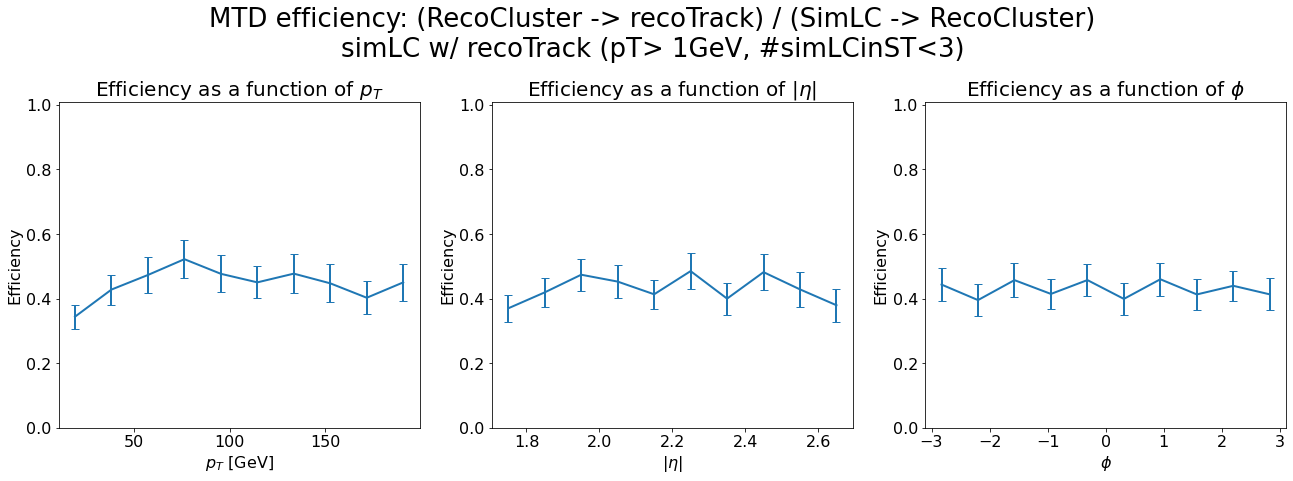

In [35]:
uflow = False
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22,6))
# fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(42,17))

fig.suptitle('MTD efficiency: (RecoCluster -> recoTrack) / (SimLC -> RecoCluster)\nsimLC w/ recoTrack (pT> 1GeV, #simLCinST<3)', fontsize=26, y=1.1)

hN, uN, cN, eN = extended_hist(np.array(num_pt), nbins = 10, range = (10, 200), underflow = uflow, overflow = uflow)
hD, uD, cD, eD = extended_hist(np.array(den_pt), nbins = 10, range = (10, 200), underflow = uflow, overflow = uflow)
errs = computeErrorRatio(hN,hD,uN,uD)
ax1.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)
ax1.set_xlabel("$p_T$ [GeV]")
ax1.set_ylabel("Efficiency")
ax1.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax1.set_title("Efficiency as a function of $p_T$")

hN, uN, cN, eN = extended_hist(np.array(num_eta), nbins = 10, range = (1.7, 2.7), underflow = uflow, overflow = uflow)
hD, uD, cD, eD = extended_hist(np.array(den_eta), nbins = 10, range = (1.7, 2.7), underflow = uflow, overflow = uflow)
hN_5, uN_5, cN_5, eN_5 = extended_hist(np.array(num_eta_5), nbins = 10, range = (1.7, 2.7), underflow = uflow, overflow = uflow)
hD_5, uD_5, cD_5, eD_5 = extended_hist(np.array(den_eta_5), nbins = 10, range = (1.7, 2.7), underflow = uflow, overflow = uflow)
hN_50, uN_50, cN_50, eN_50 = extended_hist(np.array(num_eta_50), nbins = 10, range = (1.7, 2.7), underflow = uflow, overflow = uflow)
hD_50, uD_50, cD_50, eD_50 = extended_hist(np.array(den_eta_50), nbins = 10, range = (1.7, 2.7), underflow = uflow, overflow = uflow)
hN_100, uN_100, cN_100, eN_100 = extended_hist(np.array(num_eta_10), nbins = 10, range = (1.7, 2.7), underflow = uflow, overflow = uflow)
hD_100, uD_100, cD_100, eD_100 = extended_hist(np.array(den_eta_10), nbins = 10, range = (1.7, 2.7), underflow = uflow, overflow = uflow)
errs = computeErrorRatio(hN,hD,uN,uD)
errs_5 = computeErrorRatio(hN_5,hD_5,uN_5,uD_5)
errs_50 = computeErrorRatio(hN_50,hD_50,uN_50,uD_50)
errs_100 = computeErrorRatio(hN_100,hD_100,uN_100,uD_100)
ax2.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)#, label="all")
# ax2.errorbar(cD_50, hN_50/hD_50, yerr=errs_50, capsize = 4, lw = 2, label="$pT$>50GeV")
# ax2.errorbar(cD_100, hN_100/hD_100, yerr=errs_100, capsize = 4, lw = 2, label="$pT$>10GeV")
# ax2.errorbar(cD_50, hN_5/hD_5, yerr=errs_5, capsize = 4, lw = 2, label="$pT$>5GeV")
ax2.set_xlabel("|$\eta$|")
ax2.set_ylabel("Efficiency")
# ax2.legend(loc=(0.05,0.03), fontsize=12)
ax2.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax2.set_title("Efficiency as a function of |$\eta$|")

hN, uN, cN, eN = extended_hist(np.array(num_phi), nbins = 10, range = (-np.pi, np.pi), underflow = uflow, overflow = uflow)
hD, uD, cD, eD = extended_hist(np.array(den_phi), nbins = 10, range = (-np.pi, np.pi), underflow = uflow, overflow = uflow)
errs = computeErrorRatio(hN,hD,uN,uD)
ax3.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)
ax3.set_xlabel("$\phi$")
ax3.set_ylabel("Efficiency")
ax3.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax3.set_title("Efficiency as a function of $\phi$")

## look at the low pt

In [99]:
den_pt = []
num_pt = []
den_eta = []
num_eta = []
den_phi = []
num_phi = []

for ev in range(NEVENTS):
    for i, [pt, eta, phi] in enumerate(zip(ST_simTrack_pt[ev], ST_simTrack_eta[ev], ST_simTrack_phi[ev])):
        if pt > 50 or pt < 1:
            continue
        print("--")
        
        for j, [looper, direct, correct, match] in enumerate(zip(simLC_is_looper[ev][i], simLC_DirectMatch[ev][i], simLC_CorrectMatch[ev][i], simLC_matched[ev][i])):
            if not looper:
                print(pt, direct, correct, match)
                if direct:
                    den_pt.append(pt)
                    den_eta.append(eta)
                    den_phi.append(phi)
                if match:
                    num_pt.append(pt)
                    num_eta.append(eta)
                    num_phi.append(phi)

--
14.06032943725586 True True True
14.06032943725586 True True True
--
18.04365348815918 False False False
18.04365348815918 True True True
--
31.9962215423584 True True True
31.9962215423584 False False False
--
29.41460418701172 True True True
29.41460418701172 True True True
--
48.891746520996094 True True True
48.891746520996094 True True True
--
23.144681930541992 True True True
23.144681930541992 False False False
--
1.6771979331970215 True False False
--
3.4563510417938232 True False False
3.4563510417938232 True False False
--
40.824920654296875 True True True
40.824920654296875 True True True
--
30.875179290771484 True False False
30.875179290771484 True True True
30.875179290771484 True False False
30.875179290771484 True False False
30.875179290771484 True False False
--
29.10784149169922 True True True
29.10784149169922 True True True
--
40.5841064453125 True True True
--
1.275766372680664 True False False
1.275766372680664 True False False
--
8.889993667602539 True False 

1.5803438425064087 False False False
1.5803438425064087 True False False
1.5803438425064087 True False False
1.5803438425064087 True False False
--
3.0949249267578125 True False False
3.0949249267578125 True False False
--
1.674621343612671 True False False
1.674621343612671 True False False
--
3.3473453521728516 True False False
3.3473453521728516 True False False
--
2.5850369930267334 True False False
2.5850369930267334 True False False
--
1.0464681386947632 True False False
1.0464681386947632 True False False
--
1.6608867645263672 True False False
1.6608867645263672 False False False
--
1.2925269603729248 True False False
1.2925269603729248 True False False
--
4.184194564819336 False False False
--
1.1937580108642578 True False False
1.1937580108642578 True False False
--
1.142926812171936 True False False
1.142926812171936 True False False
--
1.448376178741455 True False False
--
3.5994184017181396 True False False
3.5994184017181396 False False False
--
6.9984893798828125 False Fa

2.6298577785491943 False False False
--
1.3927987813949585 True True True
1.3927987813949585 True True True
--
5.705898284912109 True False False
--
1.221314787864685 True False False
--
2.743072986602783 True True True
2.743072986602783 True True True
--
5.208122730255127 True True True
5.208122730255127 True True True
--
4.043476104736328 False False False
--
13.339811325073242 True True True
13.339811325073242 False False False
--
1.2363494634628296 True False False
1.2363494634628296 False False False
--
27.112836837768555 True False False
27.112836837768555 False False False
--
29.310821533203125 True False False
29.310821533203125 True False False
--
6.052603721618652 True False False
6.052603721618652 True False False
--
13.900227546691895 True False False
13.900227546691895 True False False
13.900227546691895 False False False
--
7.589046478271484 True False False
--
2.220811128616333 False False False
2.220811128616333 True False False
--
2.167144775390625 True False False
2.1

3.3893299102783203 True False False
3.3893299102783203 True False False
--
6.167715549468994 True False False
--
28.552255630493164 True False False
--
17.36981964111328 True False False
17.36981964111328 False False False
--
22.439817428588867 True False False
--
7.065013885498047 True False False
7.065013885498047 True False False
--
12.53262996673584 False False False
12.53262996673584 True False False
--
1.5553665161132812 True False False
1.5553665161132812 True False False
1.5553665161132812 True False False
--
46.807098388671875 True True True
--
26.095317840576172 False False False
26.095317840576172 True True True
--
49.33233642578125 True True True
49.33233642578125 True True True
--
1.4231541156768799 False False False
1.4231541156768799 True False False
1.4231541156768799 True False False
--
2.008255958557129 True False False
2.008255958557129 False False False
2.008255958557129 True False False
2.008255958557129 True False False
2.008255958557129 True False False
--
4.3738

1.6209114789962769 True False False
1.6209114789962769 True False False
--
36.27869415283203 True True True
36.27869415283203 False False False
--
1.2538440227508545 True False False
1.2538440227508545 True False False
1.2538440227508545 True False False
1.2538440227508545 True False False
1.2538440227508545 True False False
1.2538440227508545 True False False
1.2538440227508545 True False False
--
1.2749552726745605 True False False
1.2749552726745605 True False False
1.2749552726745605 True False False
1.2749552726745605 True False False
1.2749552726745605 True False False
--
2.1305415630340576 False False False
2.1305415630340576 True False False
--
1.1746807098388672 False False False
1.1746807098388672 True False False
--
2.5138773918151855 True False False
2.5138773918151855 True False False
--
13.95655345916748 True True True
13.95655345916748 True True True
--
3.889678955078125 True False False
3.889678955078125 True False False
3.889678955078125 True False False
3.889678955078

3.842463254928589 False False False
3.842463254928589 True False False
--
1.7411760091781616 False False False
1.7411760091781616 True False False
--
1.6812248229980469 True False False
--
17.578025817871094 True False False
--
1.156120777130127 True False False
1.156120777130127 True False False
--
3.2734594345092773 True False False
3.2734594345092773 True False False
3.2734594345092773 True False False
3.2734594345092773 True False False
--
4.664645195007324 True False False
--
4.842463970184326 True False False
4.842463970184326 True False False
--
2.501596212387085 True False False
2.501596212387085 True False False
--
22.954065322875977 True False False
22.954065322875977 True False False
--
15.625649452209473 True False False
15.625649452209473 True False False
--
1.6935251951217651 True False False
1.6935251951217651 True False False
1.6935251951217651 True False False
--
8.41882610321045 True False False
--
4.466576099395752 True False False
--
2.0293350219726562 True False Fa

10.402365684509277 True False False
10.402365684509277 True False False
10.402365684509277 True False False
--
2.6635284423828125 True False False
2.6635284423828125 True False False
--
1.210305094718933 True False False
--
17.614627838134766 False False False
--
2.0573017597198486 True False False
2.0573017597198486 False False False
--
22.033802032470703 True False False
22.033802032470703 True False False
--
1.7648873329162598 True False False
--
29.42367172241211 True False False
--
10.70641040802002 True False False
--
1.3908108472824097 True False False
--
2.126807928085327 True False False
--
1.103097915649414 True False False
1.103097915649414 True False False
--
7.3133673667907715 True False False
7.3133673667907715 True False False
--
42.37770080566406 True True True
42.37770080566406 True True True
--
13.68181324005127 True True True
13.68181324005127 True True True
--
1.342831015586853 False False False
1.342831015586853 True False False
--
1.1022207736968994 True False Fal

4.218352794647217 True False False
--
2.23968505859375 True False False
2.23968505859375 True False False
2.23968505859375 True False False
2.23968505859375 True False False
--
2.1007239818573 True False False
--
5.521117210388184 True False False
--
1.8477100133895874 True False False
1.8477100133895874 True False False
1.8477100133895874 True False False
--
5.123661994934082 True False False
--
2.6389338970184326 True False False
2.6389338970184326 True False False
--
2.0688836574554443 True False False
2.0688836574554443 False False False
2.0688836574554443 True False False
--
1.3233885765075684 True False False
1.3233885765075684 True False False
--
23.4659366607666 True True True
23.4659366607666 True True True
--
43.75190353393555 True True True
43.75190353393555 True True True
--
2.5878305435180664 True False False
2.5878305435180664 False False False
2.5878305435180664 True False False
--
1.5274275541305542 False False False
1.5274275541305542 True False False
--
3.278177022933

11.871780395507812 False False False
11.871780395507812 True True True
--
14.65534496307373 True True True
14.65534496307373 True True True
--
1.0913937091827393 True False False
1.0913937091827393 True False False
--
8.206124305725098 True False False
8.206124305725098 True False False
--
3.185499429702759 True False False
3.185499429702759 True False False
--
4.167503356933594 True False False
4.167503356933594 True False False
--
6.00344705581665 True False False
6.00344705581665 True False False
--
2.87534236907959 False False False
2.87534236907959 True False False
--
3.7059133052825928 True False False
3.7059133052825928 True False False
3.7059133052825928 True False False
--
16.59398651123047 True False False
--
8.25944709777832 True False False
8.25944709777832 True False False
--
40.17391586303711 True True True
40.17391586303711 True True True
--
14.335551261901855 True True True
14.335551261901855 True True True
--
1.0025097131729126 True False False
1.0025097131729126 True 

1.0611209869384766 True False False
--
21.927244186401367 True False False
--
19.659189224243164 True True True
19.659189224243164 True True True
--
1.7647080421447754 True False False
1.7647080421447754 True False False
--
9.621916770935059 False False False
--
1.176302194595337 False False False
1.176302194595337 True False False
--
1.2942428588867188 True False False
1.2942428588867188 True False False
--
1.7772003412246704 True False False
1.7772003412246704 True False False
--
3.0101189613342285 True False False
3.0101189613342285 True False False
--
5.314866065979004 True False False
5.314866065979004 True False False
--
1.0491787195205688 True False False
1.0491787195205688 True False False
--
1.2713626623153687 True False False
1.2713626623153687 True False False
--
2.485293388366699 True False False
--
1.517765998840332 True False False
1.517765998840332 False False False
--
1.1924917697906494 True False False
1.1924917697906494 True False False
--
4.242064952850342 True False

5.390904426574707 True False False
--
8.147867202758789 True False False
8.147867202758789 True False False
--
1.691175937652588 True False False
1.691175937652588 True False False
--
1.8953856229782104 True False False
1.8953856229782104 True False False
--
2.2879505157470703 True False False
--
14.054509162902832 True False False
--
4.964102268218994 True False False
4.964102268218994 True False False
--
3.406503677368164 True False False
3.406503677368164 False False False
--
1.9714165925979614 True False False
1.9714165925979614 True False False
--
1.0179007053375244 False False False
1.0179007053375244 True False False
--
1.635386347770691 True False False
--
1.5166059732437134 True False False
1.5166059732437134 True False False
--
1.4771728515625 True False False
--
5.0545573234558105 True False False
--
20.974720001220703 True False False
20.974720001220703 False False False
--
1.74098801612854 False False False
1.74098801612854 True False False
--
25.460681915283203 True False

1.755313515663147 False False False
--
9.058835983276367 True True True
9.058835983276367 True False False
9.058835983276367 True True True
--
1.077786922454834 True False False
1.077786922454834 False False False
1.077786922454834 True False False
--
6.279143333435059 False False False
--
1.212428092956543 True False False
--
1.4142465591430664 True False False
1.4142465591430664 True False False
--
3.912275552749634 True False False
--
13.280250549316406 True False False
--
5.341344833374023 True False False
5.341344833374023 True False False
--
1.1812891960144043 True False False
1.1812891960144043 True False False
--
3.9517853260040283 True False False
3.9517853260040283 True False False
--
1.0189480781555176 True False False
1.0189480781555176 True False False
--
2.56974196434021 True False False
2.56974196434021 True False False
--
1.3998972177505493 True False False
1.3998972177505493 True False False
1.3998972177505493 True False False
1.3998972177505493 True False False
--
13.

26.037508010864258 True False False
--
2.9566726684570312 True False False
2.9566726684570312 True False False
--
11.0157470703125 True False False
--
2.79347562789917 True False False
2.79347562789917 True False False
--
24.68926429748535 True False False
--
1.0632094144821167 True True True
1.0632094144821167 True False False
1.0632094144821167 True True True
--
11.147005081176758 True False False
11.147005081176758 True False False
11.147005081176758 False False False
11.147005081176758 False False False
11.147005081176758 True False False
11.147005081176758 True False False
11.147005081176758 True False False
--
1.794978380203247 True False False
1.794978380203247 True False False
--
2.5399258136749268 True False False
2.5399258136749268 True False False
--
1.0000355243682861 True False False
1.0000355243682861 True False False
--
1.8334355354309082 True False False
1.8334355354309082 True False False
--
1.9245449304580688 True False False
--
3.1588568687438965 True False False
--


1.2354384660720825 True False False
1.2354384660720825 True False False
--
5.0487236976623535 True False False
--
2.494647979736328 True False False
2.494647979736328 True False False
--
10.320626258850098 True False False
--
5.457772731781006 True False False
--
5.215754508972168 True False False
5.215754508972168 True False False
--
1.970125675201416 True False False
1.970125675201416 True False False
--
4.893470764160156 True False False
4.893470764160156 True False False
--
18.909645080566406 True False False
18.909645080566406 True False False
18.909645080566406 True False False
--
4.9010467529296875 True False False
--
26.21140480041504 True False False
--
3.404860734939575 True False False
3.404860734939575 True False False
--
1.2454252243041992 False False False
1.2454252243041992 True False False
--
11.52835464477539 True False False
11.52835464477539 True False False
11.52835464477539 True False False
11.52835464477539 True False False
11.52835464477539 False False False
--
2

10.770146369934082 True False False
--
1.7389158010482788 False False False
1.7389158010482788 True False False
--
9.780205726623535 True False False
9.780205726623535 True False False
--
48.58217239379883 True True True
48.58217239379883 True True True
--
1.5924216508865356 True False False
--
2.7072486877441406 False False False
--
1.2102514505386353 True False False
1.2102514505386353 True False False
1.2102514505386353 True False False
1.2102514505386353 True False False
1.2102514505386353 True False False
--
3.0095009803771973 False False False
--
3.340104341506958 True False False
3.340104341506958 False False False
--
36.318328857421875 True False False
36.318328857421875 False False False
--
1.4976319074630737 False False False
1.4976319074630737 True False False
--
36.559906005859375 True False False
--
3.3987600803375244 True False False
3.3987600803375244 True False False
3.3987600803375244 True False False
--
3.115556478500366 False False False
3.115556478500366 True False 

24.012130737304688 True True True
24.012130737304688 True True True
--
9.823726654052734 False False False
--
1.669440746307373 True False False
1.669440746307373 True False False
--
1.3009692430496216 True False False
1.3009692430496216 True False False
--
3.3894333839416504 False False False
3.3894333839416504 True False False
--
4.8822808265686035 True False False
4.8822808265686035 True False False
--
19.57205581665039 True True True
--
2.840092182159424 True False False
2.840092182159424 True False False
2.840092182159424 True False False
--
1.9118188619613647 True False False
1.9118188619613647 True False False
--
1.8892173767089844 True False False
1.8892173767089844 True False False
1.8892173767089844 True False False
--
3.304171085357666 True False False
--
7.311914443969727 True False False
7.311914443969727 False False False
--
7.214910507202148 False False False
7.214910507202148 False False False
--
2.3130366802215576 True False False
2.3130366802215576 True False False
--

--
1.1156915426254272 True False False
--
2.0770866870880127 True False False
2.0770866870880127 True False False
--
4.358997821807861 True False False
--
32.29447555541992 True True True
32.29447555541992 True True True
--
41.86167907714844 True True True
41.86167907714844 True True True
--
7.227530479431152 True False False
--
12.640324592590332 True False False
--
5.38720178604126 True False False
5.38720178604126 True False False
5.38720178604126 True False False
5.38720178604126 True False False
5.38720178604126 False False False
--
1.369755744934082 True False False
--
4.650815486907959 True False False
--
3.2060303688049316 True False False
--
1.7369402647018433 True False False
--
1.1162775754928589 True False False
1.1162775754928589 True False False
--
1.3629382848739624 True False False
--
1.8246486186981201 True False False
1.8246486186981201 False False False
--
10.494524002075195 False False False
--
19.437463760375977 True True True
19.437463760375977 True False False
19

13.619248390197754 True False False
13.619248390197754 True False False
--
29.103504180908203 True False False
29.103504180908203 False False False
--
2.3025729656219482 True False False
2.3025729656219482 False False False
--
4.072177410125732 True False False
4.072177410125732 True False False
--
11.481075286865234 True False False
11.481075286865234 True False False
--
22.17462730407715 True True True
22.17462730407715 True True True
--
31.623876571655273 True False True
31.623876571655273 True False True
--
5.046986103057861 True False False
5.046986103057861 True False False
5.046986103057861 True False False
5.046986103057861 True False False
5.046986103057861 False False False
5.046986103057861 True False False
--
1.3069177865982056 True False False
1.3069177865982056 True False False
--
1.098563551902771 True False False
1.098563551902771 True False False
--
1.6158814430236816 True False False
1.6158814430236816 True False False
--
2.19649076461792 True False False
2.1964907646

1.4011396169662476 True False False
1.4011396169662476 True False False
--
2.146531105041504 True False False
--
1.8899364471435547 True False False
1.8899364471435547 True False False
1.8899364471435547 True False False
--
2.8149187564849854 True False False
2.8149187564849854 True False False
--
3.788710355758667 True False False
3.788710355758667 True False False
--
1.2981237173080444 True False False
1.2981237173080444 True False False
--
5.157702445983887 False False False
5.157702445983887 False False False
--
18.049057006835938 True False False
--
25.17998504638672 False False False
25.17998504638672 True False False
25.17998504638672 True False False
--
12.842623710632324 True False False
12.842623710632324 True False False
--
5.643589973449707 True True True
5.643589973449707 True True True
--
1.16313898563385 True False False
--
1.3611032962799072 True False False
--
3.224480390548706 True False False
--
1.7441766262054443 True False False
1.7441766262054443 False False False

3.5020315647125244 True False False
--
8.130763053894043 False False False
--
2.0290772914886475 True False False
--
1.4477574825286865 False False False
--
1.2157498598098755 False False False
1.2157498598098755 True False False
1.2157498598098755 False False False
--
9.744847297668457 True False False
--
1.0033138990402222 True False False
1.0033138990402222 False False False
1.0033138990402222 True False False
--
11.2039213180542 True False False
11.2039213180542 True False False
--
6.698955059051514 True False False
--
3.400953531265259 True False False
3.400953531265259 True False False
--
2.1661713123321533 True False False
2.1661713123321533 True False False
--
8.078360557556152 True False False
8.078360557556152 True False False
--
28.498138427734375 True True True
28.498138427734375 True True True
--
11.168506622314453 True True True
11.168506622314453 True True True
--
42.060787200927734 True True True
42.060787200927734 True True True
--
1.5348535776138306 False False False


3.258192777633667 True False False
3.258192777633667 True False False
--
1.1645904779434204 True False False
1.1645904779434204 True False False
--
48.185123443603516 True True True
48.185123443603516 True True True
--
1.0420280694961548 True False False
1.0420280694961548 True False False
--
1.0820214748382568 True False False
1.0820214748382568 True False False
--
5.616333484649658 True False False
5.616333484649658 True False False
--
6.148865222930908 False False False
6.148865222930908 True False False
--
7.476724147796631 False False False
7.476724147796631 True False False
--
4.761192798614502 True False False
4.761192798614502 True False False
4.761192798614502 True False False
--
39.5195426940918 True True True
39.5195426940918 False False False
--
1.9531434774398804 True False False
1.9531434774398804 False False False
--
40.57915115356445 False False False
--
1.3803801536560059 True False False
--
1.9877907037734985 True False False
--
1.1797118186950684 True False False
1.1

4.1701273918151855 True False False
--
1.3324724435806274 True False False
1.3324724435806274 True False False
1.3324724435806274 True False False
1.3324724435806274 True False False
--
2.9804670810699463 True False False
--
4.206009864807129 True True True
4.206009864807129 True True True
--
8.795724868774414 True True True
--
1.2110687494277954 True False False
--
1.160365104675293 True True True
1.160365104675293 True True True
--
6.277280330657959 True True True
--
3.58328914642334 False False False
--
11.731956481933594 True False False
11.731956481933594 True False False
--
5.464110851287842 True True True
--
2.1546356678009033 True False False
--
13.203514099121094 True True True
13.203514099121094 True True True
--
40.387840270996094 True True True
40.387840270996094 True True True
--
35.207637786865234 False False False
--
32.144107818603516 True True True
32.144107818603516 True True True
--
21.242176055908203 True True True
21.242176055908203 False False False
--
24.09328079

4.70999002456665 True False False
4.70999002456665 True False False
--
7.37840461730957 True False False
7.37840461730957 True False False
7.37840461730957 True False False
--
1.3411684036254883 True False False
1.3411684036254883 True False False
--
1.774327278137207 True False False
1.774327278137207 False False False
--
3.6886346340179443 True False False
3.6886346340179443 True False False
--
3.719177722930908 True False False
3.719177722930908 True False False
--
6.81280517578125 False False False
6.81280517578125 True False False
--
46.12654495239258 True True True
46.12654495239258 True False True
46.12654495239258 True False False
46.12654495239258 True False False
46.12654495239258 True False False
--
45.378875732421875 True False False
45.378875732421875 False False False
45.378875732421875 True False False
45.378875732421875 True False False
--
21.739322662353516 True False False
21.739322662353516 True False False
21.739322662353516 True False False
21.739322662353516 True 

16.597396850585938 True False False
16.597396850585938 False False False
16.597396850585938 True False False
--
1.2795615196228027 True False False
--
2.4320132732391357 True False False
2.4320132732391357 False False False
--
1.9575809240341187 True False False
1.9575809240341187 True False False
--
1.1233278512954712 True False False
1.1233278512954712 True False False
--
1.0068525075912476 False False False
1.0068525075912476 True False False
--
1.943131923675537 True False False
1.943131923675537 True False False
1.943131923675537 True False False
1.943131923675537 True False False
1.943131923675537 True False False
1.943131923675537 True False False
1.943131923675537 True False False
--
1.6114023923873901 True False False
1.6114023923873901 True False False
--
1.610061526298523 True False False
--
1.1655950546264648 True False False
1.1655950546264648 False False False
--
1.569618821144104 True False False
1.569618821144104 True False False
--
1.1147420406341553 True False False
1

## old version

In [27]:
simLC_is_looper = ak.values_astype(simLC_is_looper, "int")
number_of_sim_LC_no_looper = []

for i in range(len(simLC_is_looper)):
    if len(number_of_mtdSimLCinST[i])>2:
        continue
    for j, [tutti, looper] in enumerate(zip(number_of_mtdSimLCinST[i], simLC_is_looper[i])):
        number_of_sim_LC_no_looper.append(tutti - sum(looper))
        if (tutti - sum(looper))> 2:
            print("i=",i, "  ", tutti, sum(looper))
            print(simLC_time[i][j], " ", recocluster_time[i][j])
            print(simLC_posX[i][j], " ", recocluster_posX[i][j])
            print(simLC_posY[i][j], " ", recocluster_posY[i][j])
nphist(number_of_sim_LC_no_looper, title="Number of MTD SimLcs in each SimTrackster", xlabel="# sim LC", ylabel="Counts / bin", bins=max(number_of_sim_LC_no_looper)+1)

NameError: name 'simLC_is_looper' is not defined

In [28]:
# quick plot with list, np array or flattened awkward array
def myhist(X, bins=30, title='title', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', ran=None, label="data", tipo="stepfilled"):
    #plt.figure(dpi=100)
    if ran==None:
        plt.hist(np.array(X), bins=bins, color=color, label=label, histtype=tipo)
    else:
        plt.hist(np.array(X), bins=bins, color=color, range=ran, label=label, histtype=tipo)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()  

In [ ]:
filter_simLC_matched = []
all_simLC = []
for i in range(len(simLC_is_looper)):
    if number_of_mtdSimTracksters[i]>2:
        continue
    for j, [tutti, looper] in enumerate(zip(number_of_mtdSimLCinST[i], simLC_is_looper[i])):
        if (tutti - sum(looper))> 2:
            continue
        filter_simLC_matched.append(sum(simLC_matched[i][j]))
        all_simLC.append(tutti - sum(looper))
            
plt.figure(figsize=(8,6))   
myhist(filter_simLC_matched, label="simLC matched with reco", xlabel="# matched", color="dodgerblue", bins=3)
myhist(all_simLC, title="simLC per event", xlabel="# matched", color="red", tipo="step", label="simLC", bins=3)
plt.legend(loc="upper left", fontsize=16)
plt.show()

In [17]:
print("0 simLC: ", all_simLC.count(0))
print("1 simLC: ", all_simLC.count(1))
print("2 simLC: ", all_simLC.count(2))

0 simLC:  2
1 simLC:  140
2 simLC:  942


In [18]:
print("0 simLC matched: ", filter_simLC_matched.count(0))
print("1 simLC matched: ", filter_simLC_matched.count(1))
print("2 simLC matched: ", filter_simLC_matched.count(2))

0 simLC matched:  68
1 simLC matched:  347
2 simLC matched:  669


In [112]:
filter_simLC_matched = []
all_simLC = []
for i in range(len(simLC_is_looper)):
#     if number_of_mtdSimTracksters[i]>2:
#         continue
    for j, [tutti, looper] in enumerate(zip(number_of_mtdSimLCinST[i], simLC_is_looper[i])):
#         if (tutti - sum(looper))> 2:
#             continue
        filter_simLC_matched.append(sum(simLC_DirectMatch[i][j]))
        all_simLC.append(tutti)# - sum(looper))
            
plt.figure(figsize=(8,6))   
myhist(filter_simLC_matched, label="simLC matched with reco", xlabel="# matched", color="dodgerblue", bins=max(all_simLC)+1, ran=(0,max(all_simLC)))
myhist(all_simLC, title="simLC per event", xlabel="# matched", color="red", label="simLC", bins=max(all_simLC)+1, tipo="step", ran=(0,max(all_simLC)))
plt.legend(loc="upper right", fontsize=16)
plt.show()

TypeError: myhist() got an unexpected keyword argument 'ran'

<Figure size 576x432 with 0 Axes>

In [57]:
# for ev in range(NEVENTS):
#     for i, [pt, eta, phi] in enumerate(zip(ST_simTrack_pt[ev], ST_simTrack_eta[ev], ST_simTrack_phi[ev])):
#         for j, [looper, direct, correct] in enumerate(zip(simLC_is_looper[ev][i], simLC_DirectMatch[ev][i], simLC_CorrectMatch[ev][i])):
#             if not looper:
#                 den_pt.append(pt)
#                 den_eta.append(eta)
#                 den_phi.append(phi)
#                 if direct and correct:
#                     num_pt.append(pt)
#                     num_eta.append(eta)
#                     num_phi.append(phi)

for ev in range(1000):
    print("n of STs: ", number_of_mtdSimTracksters[ev])
    for i in range(number_of_mtdSimTracksters[ev]):
        if (len(simLC_time[~simLC_is_looper][ev][i]))>8:
            print(" n of simLCs: ", number_of_mtdSimLCinST[ev][i])
            print("  time: ", simLC_time[~simLC_is_looper][ev][i]) #, " ", recocluster_time[i][j])
            print("  posX: ", simLC_posX[~simLC_is_looper][ev][i]) #, " ", recocluster_posX[i][j])
            print("  posY: ", simLC_posY[~simLC_is_looper][ev][i]) #, " ", recocluster_posY[i][j])        
            print("  loop: ", simLC_is_looper[~simLC_is_looper][ev][i]) #, " ", recocluster_posY[i][j])      
            print("  dirM: ", simLC_DirectMatch[~simLC_is_looper][ev][i]) #, " ", recocluster_posY[i][j])      
            print("  corM: ", simLC_CorrectMatch[~simLC_is_looper][ev][i]) #, " ", recocluster_posY[i][j])      
            print(" recoLCs associated: ")
            print("  time: ", recocluster_time[~simLC_is_looper][ev][i]) #, " ", recocluster_time[i][j])
            print("  posX: ", recocluster_posX[~simLC_is_looper][ev][i]) #, " ", recocluster_posX[i][j])
            print("  posY: ", recocluster_posY[~simLC_is_looper][ev][i]) #, " ", recocluster_posY[i][j])        
    print(" --")

n of STs:  76
 --
n of STs:  79
 --
n of STs:  97
 --
n of STs:  76
 --
n of STs:  107
 --
n of STs:  98
 --
n of STs:  75
 --
n of STs:  124
 --
n of STs:  186
 --
n of STs:  136
 --
n of STs:  156
 n of simLCs:  13
  time:  [10.1, 10.1, 10.1, 10.1, 10.2, 10.2, 10.2, 10.2, 10.2, 10.2, 10.2, 10.3]
  posX:  [0.853, 1.72, -2.03, 1.73, 1.9, -1.09, ... 0.459, 1.77, -0.853, -0.459, -0.591]
  posY:  [-0.199, -0.809, -0.861, -0.903, 0.0662, ... 0.199, -0.729, 0.199, -0.199, 0.464]
  loop:  [False, False, False, False, False, False, ... False, False, False, False, False]
  dirM:  [False, True, True, True, False, True, True, True, True, True, False, True]
  corM:  [False, True, False, False, False, False, ... False, False, False, False, False]
 recoLCs associated: 
  time:  [0, 10.1, 0, 10.2, 0, 0, 0, 0, 0, 0, 0, 0]
  posX:  [-99, 28.6, -99, 28, -99, -99, -99, -99, -99, -99, -99, -99]
  posY:  [-99, 1.39, -99, 0, -99, -99, -99, -99, -99, -99, -99, -99]
 --
n of STs:  202
 --
n of STs:  107
 --


 --
n of STs:  167
 --
n of STs:  101
 --
n of STs:  111
 --
n of STs:  77
 --
n of STs:  111
 --
n of STs:  132
 --
n of STs:  186
 --
n of STs:  176
 --
n of STs:  72
 --
n of STs:  146
 --
n of STs:  95
 --
n of STs:  96
 n of simLCs:  15
  time:  [9.83, 9.85, 9.91, 9.92, 9.92, 9.94, 9.95, 9.96, 10]
  posX:  [-1.64, -1.21, 0.328, 0.591, -0.984, -1.12, -0.91, -1.38, 0.459]
  posY:  [-0.331, 0.615, -0.331, 0.994, 0.331, 0.729, -0.0982, 0.0662, 0.729]
  loop:  [False, False, False, False, False, False, False, False, False]
  dirM:  [True, True, True, True, True, True, True, True, False]
  corM:  [False, False, False, False, True, False, False, False, False]
 recoLCs associated: 
  time:  [0, 9.87, 0, 0, 9.85, 0, 0, 0, 0]
  posX:  [-99, 6, -99, -99, 8, -99, -99, -99, -99]
  posY:  [-99, 13.3, -99, -99, 10, -99, -99, -99, -99]
 --
n of STs:  134
 --
n of STs:  157
 --
n of STs:  199
 --
n of STs:  113
 --
n of STs:  118
 --
n of STs:  214
 n of simLCs:  10
  time:  [10.2, 10.2, 10.2, 10.

 --
n of STs:  106
 --
n of STs:  125
 --
n of STs:  173
 n of simLCs:  14
  time:  [10.4, 10.4, 10.4, 10.4, 10.4, 10.5, 10.5, 10.5, 10.5]
  posX:  [-1.64, -2.03, -0.984, 1.77, -1, 0.0656, 1.12, 1.35, -0.861]
  posY:  [-0.993, 0.994, 0.994, 0.994, 0.797, 0.464, 0.464, -0.137, -0.861]
  loop:  [False, False, False, False, False, False, False, False, False]
  dirM:  [True, True, True, True, True, False, False, True, True]
  corM:  [True, False, False, False, False, False, False, False, False]
 recoLCs associated: 
  time:  [10.3, 0, 0, 0, 0, 0, 0, 0, 0]
  posX:  [3, -99, -99, -99, -99, -99, -99, -99, -99]
  posY:  [0, -99, -99, -99, -99, -99, -99, -99, -99]
 --
n of STs:  149
 --
n of STs:  146
 --
n of STs:  141
 --
n of STs:  128
 n of simLCs:  9
  time:  [10.4, 10.4, 10.4, 10.4, 10.5, 10.5, 10.5, 10.5, 10.5]
  posX:  [-1.64, -1.25, -1.77, 1.25, -1.25, -0.984, -1.38, -0.984, 1.38]
  posY:  [-0.861, 0.199, 0.331, 0.729, -0.331, 0.861, -0.0662, 0.994, 0.994]
  loop:  [False, False, False

 --
n of STs:  74
 --
n of STs:  92
 --
n of STs:  87
 --
n of STs:  204
 --
n of STs:  138
 --
n of STs:  95
 --
n of STs:  128
 --
n of STs:  157
 --
n of STs:  154
 --
n of STs:  136
 n of simLCs:  10
  time:  [10.2, 10.2, 10.2, 10.2, 10.2, 10.3, 10.3, 10.3, 10.3, 10.3]
  posX:  [1.12, -1.51, -0.984, 1.38, -1.12, 0.984, -0.591, 1.77, -1.77, 1.9]
  posY:  [0.331, 0.199, 0.861, -0.729, 0.464, 0.199, 0.464, -0.994, 0.994, -0.729]
  loop:  [False, False, False, False, False, False, False, False, False, False]
  dirM:  [True, False, True, True, False, True, False, True, True, True]
  corM:  [False, False, False, False, False, False, False, False, False, False]
 recoLCs associated: 
  time:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  posX:  [-99, -99, -99, -99, -99, -99, -99, -99, -99, -99]
  posY:  [-99, -99, -99, -99, -99, -99, -99, -99, -99, -99]
 --
n of STs:  70
 --
n of STs:  101
 --
n of STs:  237
 --
n of STs:  107
 n of simLCs:  14
  time:  [9.95, 9.97, 9.98, 9.99, 9.99, 9.99, 10, 10.1, 10

 --
n of STs:  278
 --
n of STs:  90
 n of simLCs:  17
  time:  [9.8, 9.8, 9.8, 9.81, 9.83, 9.88, 9.88, 9.9, 9.93]
  posX:  [1.12, 2.03, -1.9, 1.71, -1.56, 0.853, -1.64, -1.61, -0.984]
  posY:  [0.729, -0.464, -0.729, -0.287, 0.902, 0.861, 0.0662, -0.299, -0.729]
  loop:  [False, False, False, False, False, False, False, False, False]
  dirM:  [True, True, True, True, True, True, False, True, True]
  corM:  [False, False, False, False, False, False, False, False, False]
 recoLCs associated: 
  time:  [0, 0, 0, 9.81, 0, 0, 0, 9.91, 0]
  posX:  [-99, -99, -99, 31, -99, -99, -99, 1, -99]
  posY:  [-99, -99, -99, 2, -99, -99, -99, 5, -99]
 --
n of STs:  160
 --
n of STs:  119
 --
n of STs:  257
 n of simLCs:  11
  time:  [10.1, 10.2, 10.2, 10.2, 10.3, 10.3, 10.3, 10.3, 10.3]
  posX:  [0.426, -0.147, -0.0997, -0.0503, 1.77, -1.9, 1.77, 1.9, 0.591]
  posY:  [0.87, 0.268, -0.497, -0.29, 0.729, -0.994, 0.861, -0.861, 0.861]
  loop:  [False, False, False, False, False, False, False, False, Fals

 --
n of STs:  117
 --
n of STs:  145
 --
n of STs:  140
 --
n of STs:  119
 --
n of STs:  77
 --
n of STs:  185
 --
n of STs:  108
 --
n of STs:  172
 --
n of STs:  108
 --
n of STs:  129
 --
n of STs:  129
 --
n of STs:  180
 --
n of STs:  87
 --
n of STs:  91
 --
n of STs:  66
 --
n of STs:  117
 --
n of STs:  96
 --
n of STs:  144
 --
n of STs:  116
 --
n of STs:  143
 --
n of STs:  89
 n of simLCs:  11
  time:  [10.3, 10.3, 10.4, 10.4, 10.4, 10.4, 10.4, 10.4, 10.4, 10.4, 10.5]
  posX:  [-0.328, -1.04, 1.51, -1.12, 0.0656, 0.328, 1.77, -1.12, -1.12, 0.459, 0.853]
  posY:  [0.331, 0.511, 0.994, 0.994, 0.729, 0.861, -0.861, -0.199, 0.464, 0.994, 0.729]
  loop:  [False, False, False, False, False, False, False, False, False, False, False]
  dirM:  [True, True, True, True, True, True, True, True, True, True, True]
  corM:  [False, False, False, False, False, False, False, False, False, False, False]
 recoLCs associated: 
  time:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  posX:  [-99, -99, -9

 --
n of STs:  152
 --
n of STs:  114
 --
n of STs:  80
 --
n of STs:  119
 --
n of STs:  133
 n of simLCs:  11
  time:  [9.99, 9.99, 10, 10, 10.1, 10.1, 10.1, 10.1, 10.2, 10.2]
  posX:  [0.459, 0.328, -0.722, -0.591, 1.25, 1.25, 2.03, -0.459, 1.12, -2.03]
  posY:  [0.994, -0.729, 0.861, 0.994, -0.994, 0.861, -0.729, 0.331, 0.199, 0.464]
  loop:  [False, False, False, False, False, False, False, False, False, False]
  dirM:  [True, True, True, True, True, True, True, False, True, False]
  corM:  [False, False, False, False, False, False, False, False, False, False]
 recoLCs associated: 
  time:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  posX:  [-99, -99, -99, -99, -99, -99, -99, -99, -99, -99]
  posY:  [-99, -99, -99, -99, -99, -99, -99, -99, -99, -99]
 --
n of STs:  137
 --
n of STs:  200
 n of simLCs:  12
  time:  [9.95, 9.99, 10, 10, 10.1, 10.1, 10.1, 10.1, 10.1, 10.1]
  posX:  [-0.984, -0.984, 1.64, 1.38, -1.64, 1.38, 0.37, -0.95, -0.328, 0.591]
  posY:  [-0.918, -0.861, -0.596, -0.994, -0.

 --
n of STs:  73
 n of simLCs:  23
  time:  [10.3, 10.3, 10.3, 10.3, 10.4, 10.4, 10.4, 10.4, 10.4, 10.4]
  posX:  [-0.591, -0.796, 1.12, -1.9, -0.197, -0.00455, 1.12, -0.335, -1.25, -0.328]
  posY:  [-0.994, 0.713, -0.994, -0.994, -0.994, 0.947, -0.994, 0.561, -0.861, -0.464]
  loop:  [False, False, False, False, False, False, False, False, False, False]
  dirM:  [True, True, True, True, True, True, True, True, True, True]
  corM:  [False, True, False, False, False, True, False, False, False, False]
 recoLCs associated: 
  time:  [0, 10.3, 0, 0, 0, 10.3, 0, 0, 0, 0]
  posX:  [-99, 9.03, -99, -99, -99, 15, -99, -99, -99, -99]
  posY:  [-99, 13, -99, -99, -99, 15, -99, -99, -99, -99]
 --
n of STs:  202
 n of simLCs:  12
  time:  [10.1, 10.1, 10.1, 10.1, 10.2, 10.2, 10.2, 10.2, 10.2, 10.2, 10.2, 10.2]
  posX:  [-1.64, 0.591, -0.328, 0.591, -0.722, -1.51, ... 1.51, 0.423, -0.722, 1.12, -1.38]
  posY:  [-0.596, 0.199, -0.861, 0.729, -0.861, ... -0.464, 0.331, -0.861, 0.596, -0.994]
  loop:

 --
n of STs:  109
 --
n of STs:  128
 --
n of STs:  155
 --
n of STs:  113
 --
n of STs:  155
 --
n of STs:  114
 --
n of STs:  78
 n of simLCs:  20
  time:  [10.4, 10.4, 10.4, 10.4, 10.4, 10.5, 10.5, 10.5, 10.5, 10.5]
  posX:  [-1.56, -0.197, -0.197, -1.25, -1.57, -2.03, 2.03, 0.0656, 0.853, -0.682]
  posY:  [-0.364, -0.0662, 0.861, 0.861, -0.106, -0.861, 0.861, 0.71, -0.596, -0.102]
  loop:  [False, False, False, False, False, False, False, False, False, False]
  dirM:  [True, False, True, True, True, True, True, True, True, True]
  corM:  [False, False, False, False, True, False, False, False, False, False]
 recoLCs associated: 
  time:  [10.4, 0, 0, 0, 10.4, 0, 0, 0, 0, 0]
  posX:  [2, -99, -99, -99, 3, -99, -99, -99, -99, -99]
  posY:  [3, -99, -99, -99, 9, -99, -99, -99, -99, -99]
 --
n of STs:  151
 --
n of STs:  42
 --
n of STs:  160
 --
n of STs:  149
 --
n of STs:  153
 --
n of STs:  76
 --
n of STs:  135
 --
n of STs:  107
 n of simLCs:  11
  time:  [10.9, 10.9, 10.9, 10.9,

 --
n of STs:  137
 n of simLCs:  16
  time:  [11, 11.1, 11.1, 11.1, 11.1, 11.1, 11.1, 11.1, 11.1, 11.2]
  posX:  [1.05, 1.12, -1.64, -1.64, 1.82, -1.91, 1.88, 1.9, -1.9, 1.51]
  posY:  [-0.0808, -0.861, -0.861, 0.331, -0.485, -0.701, -0.0104, 0.199, 0.994, 0.0207]
  loop:  [False, False, False, False, False, False, False, False, False, False]
  dirM:  [True, True, True, True, True, True, True, True, False, True]
  corM:  [False, False, False, False, False, False, False, False, False, False]
 recoLCs associated: 
  time:  [11.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  posX:  [27.5, -99, -99, -99, -99, -99, -99, -99, -99, -99]
  posY:  [6, -99, -99, -99, -99, -99, -99, -99, -99, -99]
 --
n of STs:  137
 --
n of STs:  105
 --
n of STs:  170
 --
n of STs:  145
 --
n of STs:  58
 --
n of STs:  113
 --
n of STs:  149
 --
n of STs:  100
 --
n of STs:  163
 --
n of STs:  127
 --
n of STs:  85
 --
n of STs:  109
 --
n of STs:  156
 --
n of STs:  163
 --
n of STs:  90
 --
n of STs:  113
 --
n of STs:  210

 n of simLCs:  18
  time:  [9.92, 9.98, 9.98, 10, 10, 10, 10, 10.1, 10.1, 10.1, 10.1]
  posX:  [-1.41, -1.77, -0.591, -1.27, 1.88, -1.12, -1.44, -0.0656, 1.12, 0.853, 2.03]
  posY:  [0.976, 0.994, 0.199, 0.543, -0.149, ... -0.378, -0.596, 0.331, 0.464, -0.199]
  loop:  [False, False, False, False, False, False, False, False, False, False, False]
  dirM:  [True, True, True, True, True, False, True, True, True, True, True]
  corM:  [True, False, False, False, False, False, False, False, False, False, False]
 recoLCs associated: 
  time:  [9.89, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0]
  posX:  [4, -99, -99, 5, -99, -99, -99, -99, -99, -99, -99]
  posY:  [15, -99, -99, 12, -99, -99, -99, -99, -99, -99, -99]
 --
n of STs:  92
 --
n of STs:  178
 --
n of STs:  64
 --
n of STs:  76
 --
n of STs:  117
 --
n of STs:  135
 --
n of STs:  93
 --
n of STs:  113
 --
n of STs:  150
 --
n of STs:  183
 --
n of STs:  69
 --
n of STs:  192
 n of simLCs:  25
  time:  [10.3, 10.4, 10.4, 10.4, 10.4, 10.5, 10.5, 10.

 --
n of STs:  124
 --
n of STs:  133
 --
n of STs:  58
 --
n of STs:  166
 --
n of STs:  165
 --
n of STs:  89
 n of simLCs:  12
  time:  [10, 10.1, 10.1, 10.1, 10.1, 10.1, 10.1, 10.2, 10.2, 10.2, 10.2, 10.2]
  posX:  [0.853, -0.328, -0.591, 1.12, 1.77, -1.9, ... 0.459, -0.197, 0.984, 1.64, -1.25]
  posY:  [-0.464, -0.861, 0.464, -0.464, 0.729, ... 0.861, 0.199, -0.994, 0.199, 0.331]
  loop:  [False, False, False, False, False, False, ... False, False, False, False, False]
  dirM:  [True, True, False, True, True, True, True, True, True, True, True, False]
  corM:  [False, False, False, True, False, False, ... False, False, False, False, False]
 recoLCs associated: 
  time:  [0, 0, 0, 10.1, 0, 0, 0, 0, 0, 0, 0, 0]
  posX:  [-99, -99, -99, 24, -99, -99, -99, -99, -99, -99, -99, -99]
  posY:  [-99, -99, -99, 4, -99, -99, -99, -99, -99, -99, -99, -99]
 n of simLCs:  9
  time:  [9.78, 9.78, 9.79, 9.82, 9.87, 9.87, 9.87, 9.88, 9.9]
  posX:  [0.459, -0.328, 1.25, -0.0656, 0.0656, 0.328, 0.45

 n of simLCs:  18
  time:  [10.6, 10.6, 10.6, 10.6, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7]
  posX:  [0.922, 1.9, -1.9, -0.831, 0.843, 1.38, -1.77, 1.12, -1.25, -1.77]
  posY:  [-0.292, -0.994, 0.596, 0.335, -0.321, -0.199, -0.861, 0.199, 0.596, 0.464]
  loop:  [False, False, False, False, False, False, False, False, False, False]
  dirM:  [True, False, False, True, True, True, True, True, True, True]
  corM:  [False, False, False, False, False, False, False, False, False, False]
 recoLCs associated: 
  time:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  posX:  [-99, -99, -99, -99, -99, -99, -99, -99, -99, -99]
  posY:  [-99, -99, -99, -99, -99, -99, -99, -99, -99, -99]
 --
n of STs:  114
 --
n of STs:  69
 --
n of STs:  184
 --
n of STs:  110
 n of simLCs:  10
  time:  [9.97, 9.98, 10, 10, 10.1, 10.1, 10.1, 10.1, 10.1]
  posX:  [2.03, -2.03, -1.18, 1.77, -0.591, 1.12, -0.197, 1.12, 0.0656]
  posY:  [-0.331, 0.596, -0.143, 0.861, -0.464, -0.464, -0.994, 0.596, -0.199]
  loop:  [False, False, False, Fa

 --
n of STs:  176
 --
n of STs:  88
 n of simLCs:  10
  time:  [9.83, 9.85, 9.87, 9.88, 9.91, 9.93, 9.95, 9.95, 9.96, 9.97]
  posX:  [-1.38, 0.0656, -0.591, 1.12, -1.64, -0.197, -2.03, -1.77, -0.328, -0.197]
  posY:  [0.464, 0.994, 0.861, 0.0662, 0.994, 0.729, 0.464, 0.994, 0.464, 0.464]
  loop:  [False, False, False, False, False, False, False, False, False, False]
  dirM:  [True, True, True, False, True, False, True, True, True, True]
  corM:  [False, False, False, False, False, False, False, False, False, False]
 recoLCs associated: 
  time:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  posX:  [-99, -99, -99, -99, -99, -99, -99, -99, -99, -99]
  posY:  [-99, -99, -99, -99, -99, -99, -99, -99, -99, -99]
 --
n of STs:  212
 n of simLCs:  11
  time:  [10, 10, 10.1, 10.1, 10.1, 10.1, 10.1, 10.2, 10.2]
  posX:  [1.9, -1.8, -0.722, -1.37, 1.77, 2.03, 1.38, -0.197, 1.38]
  posY:  [-0.331, -0.191, 0.596, -0.404, 0.0662, 0.994, 0.596, 0.861, 0.596]
  loop:  [False, False, False, False, False, False, Fa

KeyboardInterrupt: 